In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import lightkurve as lk
import astropy.units as u
import tkinter as tk
from tkinter import ttk
from matplotlib.figure import Figure
import matplotlib
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
from sklearn.exceptions import ConvergenceWarning
from datetime import datetime

In [161]:
types = pd.read_csv('typenames.tsv', sep=';', comment='#',skip_blank_lines = False,header = 1)
types = types.drop([0,1])
types = types.reset_index()
types = types.drop('index',axis = 1)

l = []
for i in range(len(types['_1'])):
    if type(types['_1'][i]) != str:
        l.append(i)
        
types = types.drop(l)
types = types.reset_index()
cropped = types.drop('index',axis = 1)
cropped

,_1,Type
0,312.908065 -41.341475,MISC
1,311.509773 -38.03733,NaN
2,316.664941 -45.311435,NaN
3,321.557516 -43.650433,NaN
4,318.57321 -39.753376,NaN
...,...,...
1202349,89.671272 -50.975128,NaN
1202350,99.149697 -57.524532,NaN
1202351,98.323125 -61.61681,NaN
1202352,83.360539 -59.389847,NaN


In [162]:
cam1 = pd.read_csv('Sector1_camera1.csv', sep=',', comment='#', dtype = str)
cam2 = pd.read_csv('Sector1_camera2.csv', sep=',', comment='#', dtype = str)
cam3 = pd.read_csv('Sector1_camera3.csv', sep=',', comment='#', dtype = str)
cam4 = pd.read_csv('Sector1_camera4.csv', sep=',', comment='#', dtype = str)
cams = pd.concat([cam1,cam2,cam3,cam4])
cams = cams.reset_index()
alldata = cams.drop('index',axis = 1)
alldata = alldata.drop('Unnamed: 17',axis = 1)
alldata

,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,389475380,sector01,1,1,312.908065,-41.341475,10.1590003967285,3.85199999809265,3.73200011253357,3.02600002288818,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144
1,389376930,sector01,1,1,311.509773,-38.03733,9.3120002746582,4.27500009536743,4.19899988174438,4.02699995040894,3343.0,8.72058,0.00757,18.55533867,6787.43283,0.10415349,8.16427
2,126783821,sector01,1,1,316.664941,-45.311435,7.92799997329712,5.51000022888184,5.4850001335144,5.38000011444092,4660.0,0.1555,0.00043,8.697815,56.49776,9.82695053,7.5447
3,147086540,sector01,1,1,321.557516,-43.650433,9.30099964141846,4.33199977874756,4.23799991607666,4.07600021362305,3180.0,16.56325,0.01331,12.65136727,59653.2397,0.10409945,8.02792
4,159696369,sector01,1,1,318.57321,-39.753376,8.51000022888184,4.88100004196167,4.83900022506714,4.71799993515015,3952.0,3.4978,0.00296,5.45745255,3953.34708,10.89407437,10.41665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202349,219148825,sector01,4,4,89.671272,-50.975128,17.5790004730225,14.8839998245239,14.9289999008179,8.93200016021729,4497.0,4.15811,0.06105,14.64927263,5081.44296,13.916809,11.46156
1202350,278684092,sector01,4,4,99.149697,-57.524532,17.4349994659424,15.2600002288818,14.8459997177124,9.48600006103516,4952.0,2.68769,0.00574,7.13147282,493.46808,13.906372,11.64189
1202351,293223453,sector01,4,4,98.323125,-61.61681,17.3969993591309,15.2600002288818,NaN,NaN,4990.0,0.0864,0.00081,14.64927263,31.92314,9.36826362,8.22771
1202352,382302031,sector01,4,4,83.360539,-59.389847,17.8360004425049,14.7910003662109,14.7620000839233,9.54599952697754,4244.0,0.60553,0.04795,15.46312111,350.95686,13.01413546,11.07258


In [163]:
stars = pd.concat([cropped, alldata], axis=1)

m = []
for i in range(len(stars['Type'])):
    if type(stars['Type'][i]) != str:
        m.append(i)
        
stars = stars.drop(m)
stars = stars.dropna(axis=0)
stars = stars.reset_index()
stars = stars.drop('index',axis = 1)

stars

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,312.908065 -41.341475,MISC,389475380,sector01,1,1,312.908065,-41.341475,10.1590003967285,3.85199999809265,3.73200011253357,3.02600002288818,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144
1,325.888097 -43.14454,MISC,147335949,sector01,1,1,325.888097,-43.14454,10.1979999542236,4.3270001411438,4.21199989318848,3.90599989891052,3070.0,30.66852,0.0231,11.59708667,2427.2134,0.10409945,7.5651
2,316.58919 -37.587605,DSCT,115112430,sector01,1,1,316.58919,-37.587605,7.67000007629395,6.79899978637695,6.68900012969971,6.76300001144409,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431
3,316.495762 -36.25944,EW,115105140,sector01,1,1,316.495762,-36.25944,7.81099987030029,6.57299995422363,6.49300003051758,6.38700008392334,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553
4,320.519456 -42.76817,SRB,200644705,sector01,1,1,320.519456,-42.76817,10.4829998016357,4.31699991226196,4.28599977493286,3.56200003623962,2907.0,63.64927,0.04856,14.64895158,3442.16087,0.10420759,8.50958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41872,92.826212 -56.90276,EW,260161772,sector01,4,4,92.826212,-56.90276,17.1599998474121,14.8839998245239,15.2379999160767,9.57800006866455,4793.0,-0.243,0.02027,4.63893633,14.45717,9.82710261,6.86001
41873,97.94567 -58.773052,VAR,260640922,sector01,4,4,97.94567,-58.773052,17.1709995269775,15.3570003509521,15.3039999008179,9.32999992370605,5341.0,20.27747,0.02997,7.13682513,654.57714,13.916809,8.16853
41874,93.37453 -52.261765,EW,219213458,sector01,4,4,93.37453,-52.261765,17.5259990692139,14.9659996032715,14.6759996414185,9.24499988555908,4605.0,0.18696,0.00279,14.64927263,632.78786,12.22142791,11.37015
41875,85.931843 -60.109595,ROT,149539111,sector01,4,4,85.931843,-60.109595,17.5510005950928,15.0290002822876,14.7110004425049,9.76500034332275,4637.0,4.06335,0.01727,0.43086096,1338.48609,0.43110368,9.22725


In [5]:
h = []
for i in range(len(stars['Type'])):
    if 'MISC' not in stars['Type'][i]:
        h.append(i)
MISC = stars.drop(h)

for val in MISC.Type.unique():
    MISC.replace(to_replace=val, value='MISC', inplace=True)

MISC = MISC.reset_index()
MISC = MISC.drop('index',axis = 1)

MISC

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,312.908065 -41.341475,MISC,389475380,sector01,1,1,312.908065,-41.341475,10.1590003967285,3.85199999809265,3.73200011253357,3.02600002288818,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144
1,325.888097 -43.14454,MISC,147335949,sector01,1,1,325.888097,-43.14454,10.1979999542236,4.3270001411438,4.21199989318848,3.90599989891052,3070.0,30.66852,0.0231,11.59708667,2427.2134,0.10409945,7.5651
2,322.923138 -46.113605,MISC,147198074,sector01,1,1,322.923138,-46.113605,9.82100009918213,4.74499988555908,4.64499998092651,4.46600008010864,3339.0,19.08789,0.01615,11.1332032,854.18351,13.01386874,9.1758
3,320.863403 -46.666603,MISC,200655862,sector01,1,1,320.863403,-46.666603,10.1149997711182,4.62400007247925,4.58599996566772,4.2020001411438,3268.0,12.60208,0.01249,11.59708667,1868.85119,13.01386874,11.52001
4,323.404587 -39.046575,MISC,382222583,sector01,1,1,323.404587,-39.046575,9.16399955749512,5.4689998626709,5.35200023651123,5.13199996948242,3827.0,10.08912,0.01071,11.0832032,1736.24946,0.10425821,7.60141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,88.393601 -65.195244,MISC,374829646,sector01,4,4,88.393601,-65.195244,16.6790008544922,14.2639999389648,14.3369998931885,9.80000019073486,4729.0,-0.1444,0.01182,14.64927263,40.45913,13.916809,10.28832
1444,103.059068 -57.737869,MISC,279158210,sector01,4,4,103.059068,-57.737869,16.9349994659424,14.4820003509521,14.4829998016357,9.55300045013428,4629.0,-0.34168,0.01152,21.41047538,19.46041,0.47611503,7.76236
1445,97.107112 -56.504776,MISC,260541216,sector01,4,4,97.107112,-56.504776,16.5599994659424,14.7760000228882,14.871000289917,9.58100032806396,5376.0,4.023,0.00754,15.46312111,2756.55528,0.10409947,8.49771
1446,91.359003 -57.473175,MISC,260042232,sector01,4,4,91.359003,-57.473175,17.4619998931885,14.3380002975464,14.298999786377,9.25100040435791,4192.0,11.33258,0.02817,12.65164455,2441.84914,0.1042076,8.22847


In [6]:
h = []
for i in range(len(stars['Type'])):
    if 'CST' not in stars['Type'][i]:
        h.append(i)
CST = stars.drop(h)

for val in CST.Type.unique():
    CST.replace(to_replace=val, value='CST', inplace=True)

CST = CST.reset_index()
CST = CST.drop('index',axis = 1)

CST

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,314.492633 -40.288267,CST,389527262,sector01,1,1,314.492633,-40.288267,11.1230001449585,9.77099990844727,9.74600028991699,8.64400005340576,6039.0,-0.31105,0.00038,3.91720197,49.06805,11.51238434,9.12735
1,325.549859 -41.095886,CST,159858576,sector01,1,1,325.549859,-41.095886,12.3500003814697,10.1180000305176,10.0509996414185,8.55900001525879,4837.0,1.5105,0.00654,9.59758897,475.89631,0.10420759,8.47635
2,314.507552 -40.289702,CST,389527261,sector01,1,1,314.507552,-40.289702,13.1429996490479,10.6300001144409,10.5729999542236,9.03699970245361,4709.0,0.21268,0.00205,14.63796526,354.69004,0.10415291,8.38601
3,325.56031 -41.107835,CST,159858575,sector01,1,1,325.56031,-41.107835,15.7419996261597,14.0600004196167,14.0719995498657,8.77700042724609,5501.0,5.46109,0.00916,9.59758897,400.33506,0.10415349,8.39134
4,325.528817 -41.134712,CST,159858568,sector01,1,1,325.528817,-41.134712,18.0049991607666,13.9700002670288,13.71399974823,8.72299957275391,3682.0,2.30495,0.00271,14.64895158,1010.70715,0.10420759,8.61805
5,336.579957 -37.522185,CST,278829715,sector01,1,2,336.579957,-37.522185,11.6450004577637,9.0629997253418,8.99499988555908,8.9040002822876,4519.0,-0.18283,0.00096,1.92999944,36.99472,6.3819987,7.00326
6,331.911136 -25.260836,CST,32177381,sector01,1,3,331.911136,-25.260836,9.85400009155273,5.95900011062622,5.9060001373291,5.72300004959106,3739.0,2.52847,0.0039,23.1946825,19953.04665,10.33320267,10.97631
7,320.010652 -27.30443,CST,326395126,sector01,1,4,320.010652,-27.30443,8.0600004196167,6.5479998588562,6.41200017929077,6.43499994277954,5661.0,8.01087,0.00656,7.95228771,16098.58438,7.89385368,11.83434
8,311.308397 -30.955672,CST,441419997,sector01,1,4,311.308397,-30.955672,8.61999988555908,7.32299995422363,7.19899988174438,7.17399978637695,6130.0,-0.13778,0.00031,14.59414789,149.49302,13.8644405,13.39624
9,319.232181 -28.604744,CST,290049697,sector01,1,4,319.232181,-28.604744,9.67000007629395,7.94000005722046,7.86700010299683,7.83599996566772,5487.0,0.33086,0.00132,15.40486611,2578.30189,13.8643795,13.8597


In [7]:
h = []
for i in range(len(stars['Type'])):
    if 'RR' not in stars['Type'][i]:
        h.append(i)
RR = stars.drop(h)

for val in RR.Type.unique():
    RR.replace(to_replace=val, value='RR', inplace=True)

RR = RR.reset_index()
RR = RR.drop('index',axis = 1)

RR

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,313.037168 -44.117469,RR,389656016,sector01,1,1,313.037168,-44.117469,8.61999988555908,7.59000015258789,7.51999998092651,7.45800018310547,6689.0,-0.24584,0.00017,2.35872949,97.95273,5.36226045,7.84118
1,316.707735 -39.548101,RR,115115015,sector01,1,1,316.707735,-39.548101,9.38199996948242,7.39099979400635,7.26200008392334,7.24700021743774,4995.5,-0.2949,0.00015,12.10130783,46.88342,13.01386874,10.6711
2,313.037233 -38.375238,RR,389477262,sector01,1,1,313.037233,-38.375238,9.4709997177124,7.34999990463257,7.28999996185303,7.31799983978271,5135.0,0.8386,0.00204,11.1332032,3955.68909,10.33303424,7.46914
3,325.529948 -41.746186,RR,159858403,sector01,1,1,325.529948,-41.746186,9.92399978637695,6.91499996185303,6.86999988555908,6.75299978256226,4206.0,0.26542,0.0012,3.81274082,135.76632,7.31803081,9.67678
4,322.482535 -42.717335,RR,147164761,sector01,1,1,322.482535,-42.717335,9.74899959564209,7.53800010681152,7.39099979400635,7.45599985122681,4478.0,-0.14223,0.00044,1.04635368,16.44768,6.00410837,6.54329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,89.575281 -61.284528,RR,149929969,sector01,4,4,89.575281,-61.284528,17.056999206543,14.628999710083,14.4980001449585,9.79800033569336,4718.0,-0.143,0.0177,17.39601125,47.00456,7.31811515,9.07022
7353,85.41509 -61.202363,RR,149497368,sector01,4,4,85.41509,-61.202363,17.0389995574951,14.4680004119873,14.4280004501343,9.88599967956543,4596.0,6.6487,0.21139,14.64927263,2653.74876,13.916809,11.67713
7354,99.935343 -56.371578,RR,278779482,sector01,4,4,99.935343,-56.371578,16.6909999847412,15.1929998397827,15.1719999313354,9.69200038909912,5745.0,-0.15129,0.01901,18.55574533,65.64432,13.916809,7.61628
7355,95.46891 -53.614799,RR,255546749,sector01,4,4,95.46891,-53.614799,17.0779991149902,14.7209997177124,14.8140001296997,9.50800037384033,4781.0,1.08254,0.0123,0.40221991,3896.26595,0.40256049,10.11502


In [165]:
h = []
for i in range(len(stars['Type'])):
    if 'EW' not in stars['Type'][i]:
        if 'EC' not in stars['Type'][i]:
            h.append(i)
EC = stars.drop(h)

for val in EC.Type.unique():
    EC.replace(to_replace=val, value='EC', inplace=True)

EC = EC.reset_index()
EC = EC.drop('index',axis = 1)

EC

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,316.495762 -36.25944,EC,115105140,sector01,1,1,316.495762,-36.25944,7.81099987030029,6.57299995422363,6.49300003051758,6.38700008392334,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553
1,315.98764 -42.852323,EC,126749065,sector01,1,1,315.98764,-42.852323,10.2679996490479,6.17700004577637,6.11899995803833,5.875,3660.0,8.4157,0.01285,9.27766933,1374.70683,0.10420759,8.23016
2,322.869983 -38.556416,EC,165108083,sector01,1,1,322.869983,-38.556416,9.47000026702881,6.91099977493286,6.96500015258789,6.98699998855591,4538.0,3.18539,0.0043,11.1332032,7921.06287,10.89407437,11.78836
3,311.249716 -38.66717,EC,389374308,sector01,1,1,311.249716,-38.66717,10.0749998092651,7.15799999237061,7.0149998664856,6.90899991989136,4504.7998046875,-0.02237,0.00067,0.20227477,82.11215,0.4041821,7.36452
4,318.491003 -35.553266,EC,92982302,sector01,1,1,318.491003,-35.553266,9.40900039672852,8.42300033569336,8.22200012207031,7.92600011825562,6883.0,51.74774,0.08502,0.47741009,8903.95492,0.95354707,9.88294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,82.792172 -57.514526,EC,382266562,sector01,4,4,82.792172,-57.514526,17.1110000610352,14.7410001754761,15.0369997024536,9.49100017547607,4769.0,0.12936,0.02366,0.16646901,324.78251,0.33306334,10.11465
7037,88.449684 -51.040981,EC,219143877,sector01,4,4,88.449684,-51.040981,16.9160003662109,15.1750001907349,15.003999710083,9.07699966430664,5428.0,3.34535,0.03297,14.64927263,986.54899,13.916809,11.08936
7038,88.451128 -51.058563,EC,219143881,sector01,4,4,88.451128,-51.058563,17.2709999084473,14.8999996185303,14.871000289917,9.53899955749512,4768.0,-0.02538,0.00461,0.24182118,103.38365,9.82710261,6.78994
7039,92.826212 -56.90276,EC,260161772,sector01,4,4,92.826212,-56.90276,17.1599998474121,14.8839998245239,15.2379999160767,9.57800006866455,4793.0,-0.243,0.02027,4.63893633,14.45717,9.82710261,6.86001


In [9]:
h = []
for i in range(len(stars['Type'])):
    if 'ED' not in stars['Type'][i]:
        if 'EA' not in stars['Type'][i]:
            if 'ESD' not in stars['Type'][i]:
                if 'EB' not in stars['Type'][i]:
                    h.append(i)
ED = stars.drop(h)

for val in ED.Type.unique():
    ED.replace(to_replace=val, value='ED', inplace=True)

ED = ED.reset_index()
ED = ED.drop('index',axis = 1)

ED

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,318.580514 -42.79865,ED,126944775,sector01,1,1,318.580514,-42.79865,8.42300033569336,7.90999984741211,7.64699983596802,7.66499996185303,7639.0,3.91685,0.01136,1.35111689,278.11897,2.69617697,12.17294
1,319.349907 -35.077507,ED,266584682,sector01,1,1,319.349907,-35.077507,10.5389995574951,6.80100011825562,6.68499994277954,6.68699979782104,3807.0,3.33931,0.0056,9.59758897,744.64868,0.10415349,8.52776
2,326.091341 -41.595419,ED,197571642,sector01,1,1,326.091341,-41.595419,12.3409996032715,6.18200016021729,6.09100008010864,5.59899997711182,2976.0,10.78949,0.02181,13.916504,2770.24812,0.10420759,8.60352
3,313.671598 -45.730729,ED,91448148,sector01,1,1,313.671598,-45.730729,9.48999977111816,8.38199996948242,8.39599990844727,8.4370002746582,6590.0,21.95104,0.06351,0.49349305,1745.40927,0.9863605,11.40109
4,314.632219 -43.754751,ED,126605720,sector01,1,1,314.632219,-43.754751,9.62600040435791,8.58800029754639,8.48700046539307,8.93200016021729,6690.0,-0.1939,0.00041,16.37235765,442.88597,13.916504,12.53238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,77.271643 -56.454617,ED,358336081,sector01,4,4,77.271643,-56.454617,17.0310001373291,15.2379999160767,14.9460000991821,9.83100032806396,5365.0,0.40446,0.00662,14.64927263,1097.47847,13.916809,8.75156
4317,87.230302 -55.472137,ED,350585206,sector01,4,4,87.230302,-55.472137,17.1450004577637,14.875,15.1239995956421,9.60599994659424,4861.0,-0.1499,0.00805,14.64927263,77.22693,0.10409947,6.0313
4318,88.451128 -51.058563,ED,219143881,sector01,4,4,88.451128,-51.058563,17.2709999084473,14.8999996185303,14.871000289917,9.53899955749512,4768.0,-0.02538,0.00461,0.24182118,103.38365,9.82710261,6.78994
4319,84.132129 -57.673344,ED,350334425,sector01,4,4,84.132129,-57.673344,17.3570003509521,15.1000003814697,15.0050001144409,9.22700023651123,4873.0,0.46179,0.05257,14.64927263,271.97023,0.68381485,10.98541


In [10]:
h = []
for i in range(len(stars['Type'])):
    if 'DSCT' not in stars['Type'][i]:
        if 'HADS' not in stars['Type'][i]:
            h.append(i)
DSCT = stars.drop(h)

for val in DSCT.Type.unique():
    DSCT.replace(to_replace=val, value='DSCT', inplace=True)

DSCT = DSCT.reset_index()
DSCT = DSCT.drop('index',axis = 1)

DSCT

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,316.58919 -37.587605,DSCT,115112430,sector01,1,1,316.58919,-37.587605,7.67000007629395,6.79899978637695,6.68900012969971,6.76300001144409,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431
1,316.602253 -37.595284,DSCT,115112425,sector01,1,1,316.602253,-37.595284,8.98600006103516,5.79500007629395,5.75899982452393,5.66099977493286,4171.0,5.12662,0.00343,0.19195178,1009.59981,0.19211005,7.20007
2,323.011194 -37.769822,DSCT,165110772,sector01,1,1,323.011194,-37.769822,9.0290002822876,8.26599979400635,8.19799995422363,8.17599964141846,7296.0,0.61889,0.00177,0.40163071,1604.05042,0.40095134,8.75011
3,322.711983 -38.513587,DSCT,165096949,sector01,1,1,322.711983,-38.513587,9.45400047302246,8.66199970245361,8.58800029754639,8.25100040435791,7085.0,0.18698,0.00106,0.11798647,1586.44772,0.10624934,7.12761
4,315.146654 -42.655623,DSCT,126659093,sector01,1,1,315.146654,-42.655623,9.47999954223633,8.79199981689453,8.79599952697754,8.38099956512451,7436.0,6.70882,0.01539,0.13916504,40.18014,0.13435165,9.17275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,95.59216 -58.775467,DSCT,260415055,sector01,4,4,95.59216,-58.775467,15.3739995956421,13.6850004196167,13.8039999008179,9.45499992370605,5633.0,-0.33454,0.00543,13.25410381,55.37604,0.16427074,9.18807
666,92.29646 -51.238232,DSCT,219196187,sector01,4,4,92.29646,-51.238232,15.5220003128052,14.4849996566772,14.4580001831055,9.53600025177002,7823.0,4.90083,0.16522,14.64927263,10855.75521,13.916809,10.84703
667,80.534923 -54.963078,DSCT,382146766,sector01,4,4,80.534923,-54.963078,15.3620004653931,14.6400003433228,14.6510000228882,9.70199966430664,7127.0,-0.49172,0.01075,13.916809,66.89366,0.12727792,9.94029
668,78.96418 -58.769398,DSCT,382033378,sector01,4,4,78.96418,-58.769398,16.0580005645752,14.1400003433228,14.1859998703003,9.70100021362305,5221.0,2.00287,0.06301,14.64927263,749.35041,0.34990768,6.46035


In [11]:
h = []
for i in range(len(stars['Type'])):
    if 'DCEP' not in stars['Type'][i]:
        h.append(i)
DCEP = stars.drop(h)

for val in DCEP.Type.unique():
    DCEP.replace(to_replace=val, value='DCEP', inplace=True)

DCEP = DCEP.reset_index()
DCEP = DCEP.drop('index',axis = 1)

DCEP

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,324.115255 -35.221623,DCEP,89464661,sector01,1,1,324.115255,-35.221623,10.6969995498657,7.84999990463257,7.77600002288818,7.57600021362305,4317.0,7.86363,0.0166,6.78853854,15374.42689,13.916504,10.20809
1,324.094037 -35.228263,DCEP,89464655,sector01,1,1,324.094037,-35.228263,12.8769998550415,10.7609996795654,10.7159996032715,8.70300006866455,5167.0,5.86632,0.01716,6.958252,5608.23413,13.916504,10.22862
2,330.914601 -35.362503,DCEP,80082272,sector01,1,2,330.914601,-35.362503,12.0629997253418,10.3269996643066,10.2880001068115,9.01200008392334,5417.7001953125,-0.00432,0.00205,1.97401546,1015.20504,1.95907409,9.09568
3,330.891332 -35.380006,DCEP,80082267,sector01,1,2,330.891332,-35.380006,13.9280004501343,12.5939998626709,12.5570001602173,8.75300025939941,6536.0,7.91392,0.07276,1.97401546,10726.19463,1.95907409,9.7343
4,336.8212 -37.852672,DCEP,278831448,sector01,1,2,336.8212,-37.852672,15.1470003128052,12.4820003509521,12.4440002441406,8.66199970245361,4453.0,2.33588,0.04251,2.7833618,4580.73696,2.77065094,9.12221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,78.234649 -58.769085,DCEP,257720769,sector01,4,4,78.234649,-58.769085,15.4849996566772,13.4610004425049,13.4029998779297,9.80399990081787,5106.0,-0.2599,0.00573,7.13682513,37.35251,4.84442525,8.00178
1774,81.180438 -56.014416,DCEP,382187692,sector01,4,4,81.180438,-56.014416,15.4580001831055,13.5080003738403,13.5,9.01700019836426,5186.0,-0.24637,0.00706,15.46312111,61.89905,0.10409947,7.30469
1775,81.518902 -60.988807,DCEP,149175695,sector01,4,4,81.518902,-60.988807,15.2799997329712,13.9180002212524,13.9169998168945,9.23400020599365,5943.0,4.58818,0.09944,4.09317912,8498.67744,4.06017795,9.0102
1776,81.167834 -55.985329,DCEP,382187701,sector01,4,4,81.167834,-55.985329,15.8629999160767,14.3319997787476,14.3870000839233,9.6540002822876,5700.0,2.59849,0.05642,3.19926644,6156.66667,3.21454229,8.92724


In [12]:
h = []
for i in range(len(stars['Type'])):
    if 'GDOR' not in stars['Type'][i]:
        h.append(i)
GDOR = stars.drop(h)

for val in GDOR.Type.unique():
    GDOR.replace(to_replace=val, value='GDOR', inplace=True)

GDOR = GDOR.reset_index()
GDOR = GDOR.drop('index',axis = 1)

GDOR

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,323.011194 -37.769822,GDOR,165110772,sector01,1,1,323.011194,-37.769822,9.0290002822876,8.26599979400635,8.19799995422363,8.17599964141846,7296.0,0.61889,0.00177,0.40163071,1604.05042,0.40095134,8.75011
1,335.695105 -33.93517,GDOR,61981530,sector01,1,2,335.695105,-33.93517,9.42800045013428,8.76099967956543,8.71599960327148,8.44699954986572,7340.0,0.77748,0.00261,0.40633019,1830.33524,0.42834266,6.45614
2,335.675906 -33.93381,GDOR,61981529,sector01,1,2,335.675906,-33.93381,15.8900003433228,14.1840000152588,14.043999671936,9.09899997711182,5837.0,1.17814,0.00384,0.40573787,667.01167,0.42834266,5.26317
3,333.043439 -38.309795,GDOR,278564552,sector01,1,2,333.043439,-38.309795,16.7229995727539,14.9879999160767,15.0209999084473,9.12800025939941,5436.0,3.08979,0.00918,13.916809,102.30108,0.10409947,7.87854
4,319.68595 -23.807812,GDOR,415687649,sector01,1,4,319.68595,-23.807812,8.72999954223633,7.97599983215332,7.90199995040894,7.80999994277954,7359.0,6.0574,0.00837,0.61577449,1699.20403,0.61468223,6.23017
5,319.685285 -23.802168,GDOR,415687650,sector01,1,4,319.685285,-23.802168,13.1490001678467,11.4770002365112,11.3819999694824,8.35599994659424,5686.0,6.27668,0.00894,0.61577449,727.25843,0.61468223,6.11416
6,319.697468 -23.807835,GDOR,439388132,sector01,1,4,319.697468,-23.807835,15.7679996490479,13.3940000534058,13.3330001831055,8.46399974822998,4765.0,5.78344,0.00851,0.61577449,846.25653,1.723477,6.62088
7,331.160184 -64.7284,GDOR,389023278,sector01,2,1,331.160184,-64.7284,7.32999992370605,6.71000003814697,6.67500019073486,6.72900009155273,7447.0,43.87504,0.03108,0.8864015,2123.30339,0.88616383,7.56841
8,317.252913 -58.332711,GDOR,220377891,sector01,2,4,317.252913,-58.332711,9.61100006103516,8.14099979400635,8.0620002746582,8.00100040435791,6983.0,3.1612,0.00535,1.06232855,978.00326,3.16383782,7.5368
9,317.269335 -58.326367,GDOR,220377888,sector01,2,4,317.269335,-58.326367,13.1920003890991,11.581000328064,11.5209999084473,9.09799957275391,5582.0,3.2137,0.00554,1.06232855,870.32509,4.23140269,7.35875


In [13]:
def clean(dataset,filename,foldername,max,min):

    cleaned = []

    for i in range(len(dataset['TIC_ID'])):
    
        TICID = dataset['TIC_ID'][i]
        SECTOR = dataset['Sector'][i]
        CAMERA = dataset['Camera'][i]
        CCD = dataset['CCD'][i]
        url = f"http://astro.phy.vanderbilt.edu/~oelkerrj/tess_ffi/sector01/clean/{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc"
        os.system(f"wget {url} -O {TICID}_{SECTOR}_{CAMERA}_{CCD}.lc > /dev/null 2>&1")
    
        data = pd.read_csv(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc",delimiter=' ',header=None,names=['time','magnitude','error'])
        data = data.to_numpy(dtype=float)
    
        if np.any(np.isnan(data)) or np.any(np.isinf(data)):
            cleaned.append('no')
            os.remove(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc")
            continue
    
        lc = lk.LightCurve(time = data[:,0],flux = data[:,1]).remove_outliers(sigma=5.0,return_mask = False)
        pg1 = lc.to_periodogram(oversample_factor=10)
        pg2 = lc.to_periodogram(minimum_period=0.025*u.day, maximum_period=20*u.day,oversample_factor=10)
        
        def plots(ax1,ax2,ax3):
            lc.scatter(ax=ax1)
            pg2.plot(ax=ax2)
            lc.remove_nans().fold(period=2*pg2.period_at_max_power).scatter(ax=ax3)

        if pg2.period_at_max_power.value > max:
            cleaned.append('no')

        elif pg2.period_at_max_power.value < min:
            cleaned.append('no')

        else:
        
            window = tk.Tk()
            window.title(f"Is this a {dataset['Type'][i]}? Index {i}")
            window.geometry("500x1000")

            fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(18,25))

            ax2.text(0.5, 0.9, f'Without constraint {pg1.period_at_max_power}', transform=ax2.transAxes, fontsize=20)
            ax2.text(0.5, 0.8, f'With constraint {pg2.period_at_max_power}', transform=ax2.transAxes, fontsize=20)

            ax1.invert_yaxis()
            ax3.invert_yaxis()

            plots(ax1,ax2,ax3)

            canvas = FigureCanvasTkAgg(fig, master=window)
            canvas.draw()

            canvas_widget = canvas.get_tk_widget()
            canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

            def yes_command():
                cleaned.append('yes')
                plt.savefig(f"{foldername}/{TICID}_{SECTOR}_{CAMERA}_{CCD}.jpg")
                plt.close(fig)
                window.update_idletasks()
                window.destroy()
        
            def no_command():
                cleaned.append('no')
                plt.close(fig)
                window.destroy()
        
            def on_key_press(event):
                if event.keysym == 'y':
                    yes_button.invoke()
                elif event.keysym == 'n':
                    no_button.invoke()
    
            yes_button = ttk.Button(window, text="Yes", command=yes_command)
            yes_button.pack(side=tk.LEFT)
    
            no_button = ttk.Button(window, text="No", command=no_command)
            no_button.pack(side=tk.RIGHT)
    
            window.bind('<y>', on_key_press)
            window.bind('<n>', on_key_press)

            window.mainloop()
    
        os.remove(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc")
        
        if i == (len(dataset['TIC_ID'])-1):
            with open(f'{filename}.csv', 'w', newline='') as csvfile:
                writer = csv.writer(csvfile)
                for item in cleaned:
                    writer.writerow([item])
    ;

In [67]:
%%capture
clean(GDOR,'GDOR_all','GDOR_images',100,0.001)
;

In [152]:
%%capture
clean(CST,'CST_all','CST_images',100,0.001)

In [15]:
DCEPto999 = DCEP.head(1000)
DCEPto999

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,324.115255 -35.221623,DCEP,89464661,sector01,1,1,324.115255,-35.221623,10.6969995498657,7.84999990463257,7.77600002288818,7.57600021362305,4317.0,7.86363,0.0166,6.78853854,15374.42689,13.916504,10.20809
1,324.094037 -35.228263,DCEP,89464655,sector01,1,1,324.094037,-35.228263,12.8769998550415,10.7609996795654,10.7159996032715,8.70300006866455,5167.0,5.86632,0.01716,6.958252,5608.23413,13.916504,10.22862
2,330.914601 -35.362503,DCEP,80082272,sector01,1,2,330.914601,-35.362503,12.0629997253418,10.3269996643066,10.2880001068115,9.01200008392334,5417.7001953125,-0.00432,0.00205,1.97401546,1015.20504,1.95907409,9.09568
3,330.891332 -35.380006,DCEP,80082267,sector01,1,2,330.891332,-35.380006,13.9280004501343,12.5939998626709,12.5570001602173,8.75300025939941,6536.0,7.91392,0.07276,1.97401546,10726.19463,1.95907409,9.7343
4,336.8212 -37.852672,DCEP,278831448,sector01,1,2,336.8212,-37.852672,15.1470003128052,12.4820003509521,12.4440002441406,8.66199970245361,4453.0,2.33588,0.04251,2.7833618,4580.73696,2.77065094,9.12221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,78.265525 -68.473991,DCEP,231747095,sector01,4,1,78.265525,-68.473991,16.3320007324219,12.826000213623,12.753999710083,9.80599975585938,3960.0,0.23779,0.02504,14.64927263,205.23527,0.10409947,7.69215
996,75.779724 -70.019731,DCEP,30765249,sector01,4,1,75.779724,-70.019731,16.7810001373291,13.1510000228882,13.1490001678467,9.10299968719482,3892.0,0.07046,0.0174,10.70523769,45.41378,0.10409947,7.19657
997,77.554155 -68.14419,DCEP,40521209,sector01,4,1,77.554155,-68.14419,16.0410003662109,14.1020002365112,13.9329996109009,9.82400035858154,5198.0,0.02286,0.0183,14.64927263,180.14375,13.916809,11.15288
998,83.84812 -67.247285,DCEP,277100291,sector01,4,1,83.84812,-67.247285,16.798999786377,13.3760004043579,13.1820001602173,9.84799957275391,4008.0,0.63439,0.02763,7.51695784,222.80274,7.31522813,9.10505


In [19]:
!python -m pip install lightkurve --upgrade

In [21]:
%%capture
clean(DCEPto999,'DCEPto999','DCEP_images',100,1.4)

In [16]:
DSCT

,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec,...,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,316.58919 -37.587605,DSCT,316.58900,-37.58761,115112430,sector01,1,1,316.58919,-37.587605,...,6.79899978637695,6.68900012969971,6.76300001144409,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431
1,316.602253 -37.595284,DSCT,316.58900,-37.58761,115112425,sector01,1,1,316.602253,-37.595284,...,5.79500007629395,5.75899982452393,5.66099977493286,4171.0,5.12662,0.00343,0.19195178,1009.59981,0.19211005,7.20007
2,323.011194 -37.769822,DSCT,323.01121,-37.76983,165110772,sector01,1,1,323.011194,-37.769822,...,8.26599979400635,8.19799995422363,8.17599964141846,7296.0,0.61889,0.00177,0.40163071,1604.05042,0.40095134,8.75011
3,322.711983 -38.513587,DSCT,322.71196,-38.51356,165096949,sector01,1,1,322.711983,-38.513587,...,8.66199970245361,8.58800029754639,8.25100040435791,7085.0,0.18698,0.00106,0.11798647,1586.44772,0.10624934,7.12761
4,315.146654 -42.655623,DSCT,315.14667,-42.65564,126659093,sector01,1,1,315.146654,-42.655623,...,8.79199981689453,8.79599952697754,8.38099956512451,7436.0,6.70882,0.01539,0.13916504,40.18014,0.13435165,9.17275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,46.831691 -65.05497,DSCT,46.83169,-65.05497,220570717,sector01,3,4,46.831691,-65.05497,...,14.7790002822876,14.8780002593994,9.23499965667725,6500.0,-0.19645,0.01719,0.28518051,118.76635,0.16360102,9.66437
397,28.803528 -62.22588,DSCT,28.83339,-62.24321,231859376,sector01,3,4,28.803528,-62.22588,...,13.7030000686646,13.5970001220703,9.02400016784668,4196.0,-0.24816,0.00274,11.59734083,138.05916,0.17593833,9.41577
398,52.856558 -66.155315,DSCT,52.85654,-66.15532,31854418,sector01,3,4,52.856558,-66.155315,...,15.1230001449585,15.0170001983643,9.70699977874756,7256.0,-1.13834,0.01358,13.916809,13.86847,0.11855417,9.21225
399,31.581516 -62.953217,DSCT,31.59911,-62.92571,233959723,sector01,3,4,31.581516,-62.953217,...,14.4069995880127,14.3579998016357,9.19999980926514,4732.0,-0.16478,0.00226,14.64927263,208.02508,0.10409947,7.23428


In [22]:
DSCT

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,316.58919 -37.587605,DSCT,115112430,sector01,1,1,316.58919,-37.587605,7.67000007629395,6.79899978637695,6.68900012969971,6.76300001144409,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431
1,316.602253 -37.595284,DSCT,115112425,sector01,1,1,316.602253,-37.595284,8.98600006103516,5.79500007629395,5.75899982452393,5.66099977493286,4171.0,5.12662,0.00343,0.19195178,1009.59981,0.19211005,7.20007
2,323.011194 -37.769822,DSCT,165110772,sector01,1,1,323.011194,-37.769822,9.0290002822876,8.26599979400635,8.19799995422363,8.17599964141846,7296.0,0.61889,0.00177,0.40163071,1604.05042,0.40095134,8.75011
3,322.711983 -38.513587,DSCT,165096949,sector01,1,1,322.711983,-38.513587,9.45400047302246,8.66199970245361,8.58800029754639,8.25100040435791,7085.0,0.18698,0.00106,0.11798647,1586.44772,0.10624934,7.12761
4,315.146654 -42.655623,DSCT,126659093,sector01,1,1,315.146654,-42.655623,9.47999954223633,8.79199981689453,8.79599952697754,8.38099956512451,7436.0,6.70882,0.01539,0.13916504,40.18014,0.13435165,9.17275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,95.59216 -58.775467,DSCT,260415055,sector01,4,4,95.59216,-58.775467,15.3739995956421,13.6850004196167,13.8039999008179,9.45499992370605,5633.0,-0.33454,0.00543,13.25410381,55.37604,0.16427074,9.18807
666,92.29646 -51.238232,DSCT,219196187,sector01,4,4,92.29646,-51.238232,15.5220003128052,14.4849996566772,14.4580001831055,9.53600025177002,7823.0,4.90083,0.16522,14.64927263,10855.75521,13.916809,10.84703
667,80.534923 -54.963078,DSCT,382146766,sector01,4,4,80.534923,-54.963078,15.3620004653931,14.6400003433228,14.6510000228882,9.70199966430664,7127.0,-0.49172,0.01075,13.916809,66.89366,0.12727792,9.94029
668,78.96418 -58.769398,DSCT,382033378,sector01,4,4,78.96418,-58.769398,16.0580005645752,14.1400003433228,14.1859998703003,9.70100021362305,5221.0,2.00287,0.06301,14.64927263,749.35041,0.34990768,6.46035


In [23]:
%%capture
clean(DSCT,'DSCT_all','DSCT_images',0.4,0.01)

In [27]:
EDto999 = ED.head(1000)
EDto999

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,318.580514 -42.79865,ED,126944775,sector01,1,1,318.580514,-42.79865,8.42300033569336,7.90999984741211,7.64699983596802,7.66499996185303,7639.0,3.91685,0.01136,1.35111689,278.11897,2.69617697,12.17294
1,319.349907 -35.077507,ED,266584682,sector01,1,1,319.349907,-35.077507,10.5389995574951,6.80100011825562,6.68499994277954,6.68699979782104,3807.0,3.33931,0.0056,9.59758897,744.64868,0.10415349,8.52776
2,326.091341 -41.595419,ED,197571642,sector01,1,1,326.091341,-41.595419,12.3409996032715,6.18200016021729,6.09100008010864,5.59899997711182,2976.0,10.78949,0.02181,13.916504,2770.24812,0.10420759,8.60352
3,313.671598 -45.730729,ED,91448148,sector01,1,1,313.671598,-45.730729,9.48999977111816,8.38199996948242,8.39599990844727,8.4370002746582,6590.0,21.95104,0.06351,0.49349305,1745.40927,0.9863605,11.40109
4,314.632219 -43.754751,ED,126605720,sector01,1,1,314.632219,-43.754751,9.62600040435791,8.58800029754639,8.48700046539307,8.93200016021729,6690.0,-0.1939,0.00041,16.37235765,442.88597,13.916504,12.53238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,354.120708 -63.339233,ED,235038723,sector01,2,2,354.120708,-63.339233,10.4940004348755,8.99600028991699,8.9370002746582,9.01299953460693,5789.0,-0.23364,0.00051,16.37271706,474.88434,13.9168095,8.94296
996,0.86881 -58.673608,ED,201251813,sector01,2,2,0.86881,-58.673608,10.7729997634888,9.3439998626709,9.26399993896484,8.87600040435791,5886.0,0.94721,0.00462,2.75580386,934.77489,13.9168095,8.384
997,354.219935 -57.713772,ED,219336670,sector01,2,2,354.219935,-57.713772,11.6049995422363,8.80399990081787,8.78699970245361,8.29699993133545,4455.0,3.97121,0.01498,3.12737292,5109.26892,6.18937996,10.40246
998,353.418929 -62.903584,ED,235015153,sector01,2,2,353.418929,-62.903584,11.1149997711182,9.48999977111816,9.44999980926514,9.01799964904785,5649.0,-0.17607,0.00106,15.46312167,220.35587,1.02674175,10.59996


In [28]:
%%capture
clean(EDto999,'EDto999','ED_images',100,0.01)

In [14]:
MISCto999 = MISC.head(1000)
MISCto999

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,312.908065 -41.341475,MISC,389475380,sector01,1,1,312.908065,-41.341475,10.1590003967285,3.85199999809265,3.73200011253357,3.02600002288818,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144
1,325.888097 -43.14454,MISC,147335949,sector01,1,1,325.888097,-43.14454,10.1979999542236,4.3270001411438,4.21199989318848,3.90599989891052,3070.0,30.66852,0.0231,11.59708667,2427.2134,0.10409945,7.5651
2,322.923138 -46.113605,MISC,147198074,sector01,1,1,322.923138,-46.113605,9.82100009918213,4.74499988555908,4.64499998092651,4.46600008010864,3339.0,19.08789,0.01615,11.1332032,854.18351,13.01386874,9.1758
3,320.863403 -46.666603,MISC,200655862,sector01,1,1,320.863403,-46.666603,10.1149997711182,4.62400007247925,4.58599996566772,4.2020001411438,3268.0,12.60208,0.01249,11.59708667,1868.85119,13.01386874,11.52001
4,323.404587 -39.046575,MISC,382222583,sector01,1,1,323.404587,-39.046575,9.16399955749512,5.4689998626709,5.35200023651123,5.13199996948242,3827.0,10.08912,0.01071,11.0832032,1736.24946,0.10425821,7.60141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,71.598903 -78.20961,MISC,319259066,sector01,4,2,71.598903,-78.20961,13.8199996948242,12.2130002975464,12.1630001068115,9.47799968719482,5964.0,-0.27513,0.00192,1.00119173,28.21543,10.89411175,6.21804
996,70.218725 -78.626312,MISC,269852226,sector01,4,2,70.218725,-78.626312,13.8570003509521,12.1300001144409,12.0959997177124,9.74899959564209,5803.0,0.55833,0.00755,0.28085903,484.37972,0.56136893,9.47592
997,94.677824 -80.020881,MISC,261400178,sector01,4,2,94.677824,-80.020881,14.5570001602173,11.1730003356934,11.0930004119873,9.18000030517578,4031.0,0.43193,0.0058,11.133252,368.51143,0.10426174,7.86778
998,96.211863 -69.231165,MISC,167120446,sector01,4,2,96.211863,-69.231165,13.8680000305176,12.3660001754761,12.3509998321533,10.1490001678467,6110.0,-0.1833,0.00431,18.55542,128.9556,12.22123974,8.00872


In [15]:
%%capture
clean(MISCto999,'MISCto999','MISC_images',100,0.01)

In [29]:
RRto999 = RR.head(1000)
RRto999

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,313.037168 -44.117469,RR,389656016,sector01,1,1,313.037168,-44.117469,8.61999988555908,7.59000015258789,7.51999998092651,7.45800018310547,6689.0,-0.24584,0.00017,2.35872949,97.95273,5.36226045,7.84118
1,316.707735 -39.548101,RR,115115015,sector01,1,1,316.707735,-39.548101,9.38199996948242,7.39099979400635,7.26200008392334,7.24700021743774,4995.5,-0.2949,0.00015,12.10130783,46.88342,13.01386874,10.6711
2,313.037233 -38.375238,RR,389477262,sector01,1,1,313.037233,-38.375238,9.4709997177124,7.34999990463257,7.28999996185303,7.31799983978271,5135.0,0.8386,0.00204,11.1332032,3955.68909,10.33303424,7.46914
3,325.529948 -41.746186,RR,159858403,sector01,1,1,325.529948,-41.746186,9.92399978637695,6.91499996185303,6.86999988555908,6.75299978256226,4206.0,0.26542,0.0012,3.81274082,135.76632,7.31803081,9.67678
4,322.482535 -42.717335,RR,147164761,sector01,1,1,322.482535,-42.717335,9.74899959564209,7.53800010681152,7.39099979400635,7.45599985122681,4478.0,-0.14223,0.00044,1.04635368,16.44768,6.00410837,6.54329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,334.027253 -36.660483,RR,278636440,sector01,1,2,334.027253,-36.660483,16.548999786377,13.7569999694824,13.75,8.99199962615967,4423.0,-0.26517,0.01448,13.895996,8.2186,0.48530294,4.42222
996,340.870455 -35.50915,RR,91511255,sector01,1,2,340.870455,-35.50915,16.0849990844727,14.0609998703003,14.0159997940063,8.67000007629395,5106.0,0.31543,0.04135,0.57746095,27.95373,0.1042076,5.63715
997,331.534999 -40.14617,RR,197759542,sector01,1,2,331.534999,-40.14617,16.3689994812012,13.7309999465942,13.5659999847412,9.29599952697754,4542.0,-0.11135,0.01676,16.33595176,49.68728,13.885559,10.35215
998,333.457005 -30.610206,RR,59823764,sector01,1,2,333.457005,-30.610206,16.8120002746582,13.6990003585815,13.6230001449585,8.90299987792969,4199.0,0.24909,0.03456,14.64927263,80.65951,13.01413546,10.37323


In [30]:
%%capture
clean(RRto999,'RRto999','RR_images',1,0.1)

In [28]:
ECto999 = EC.head(1000)
ECto999

,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,316.495762 -36.25944,EC,115105140,sector01,1,1,316.495762,-36.25944,7.81099987030029,6.57299995422363,6.49300003051758,6.38700008392334,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553
1,315.98764 -42.852323,EC,126749065,sector01,1,1,315.98764,-42.852323,10.2679996490479,6.17700004577637,6.11899995803833,5.875,3660.0,8.4157,0.01285,9.27766933,1374.70683,0.10420759,8.23016
2,322.869983 -38.556416,EC,165108083,sector01,1,1,322.869983,-38.556416,9.47000026702881,6.91099977493286,6.96500015258789,6.98699998855591,4538.0,3.18539,0.0043,11.1332032,7921.06287,10.89407437,11.78836
3,311.249716 -38.66717,EC,389374308,sector01,1,1,311.249716,-38.66717,10.0749998092651,7.15799999237061,7.0149998664856,6.90899991989136,4504.7998046875,-0.02237,0.00067,0.20227477,82.11215,0.4041821,7.36452
4,318.491003 -35.553266,EC,92982302,sector01,1,1,318.491003,-35.553266,9.40900039672852,8.42300033569336,8.22200012207031,7.92600011825562,6883.0,51.74774,0.08502,0.47741009,8903.95492,0.95354707,9.88294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,314.793789 -26.367414,EC,29580380,sector01,1,4,314.793789,-26.367414,11.58899974823,8.77600002288818,8.69799995422363,8.25599956512451,4699.89990234375,-0.15998,0.00096,19.85089929,140.43869,13.8956295,8.82122
996,312.16838 -25.443704,EC,409140313,sector01,1,4,312.16838,-25.443704,11.5159997940063,8.72799968719482,8.65499973297119,8.66300010681152,4368.60009765625,0.36279,0.00244,0.18928808,1505.75314,0.18920369,10.62114
997,310.191949 -28.796649,EC,269834179,sector01,1,4,310.191949,-28.796649,10.9930000305176,9.48799991607666,9.4370002746582,8.21399974822998,5973.0,0.31838,0.00511,8.97169516,101.04935,0.10409887,8.35142
998,320.622812 -27.250574,EC,302336220,sector01,1,4,320.622812,-27.250574,11.9840002059937,8.45199966430664,8.36400032043457,8.45300006866455,3906.0,0.66238,0.00417,6.47279233,3518.14652,10.33303397,8.54848


In [29]:
%%capture
clean(ECto999,'ECto999','EC_images',100,0.01)

In [14]:
VmKmag = []
for i in range(len(stars['Kmag'])):
    VmKmag.append(float(stars['Vmag'][i]) - float(stars['Kmag'][i]))
    
w1mw4mag = []
for i in range(len(stars['w1mag'])):
    w1mw4mag.append(float(stars['w1mag'][i]) - float(stars['w4mag'][i]))

dict = {'VmKmag': VmKmag, 'w1mw4mag': w1mw4mag} 
   
calcs = pd.DataFrame(dict)
   
ml = pd.concat([stars, calcs], axis=1)
ml = ml.drop(['_1','TIC_ID',	'Sector','Camera','CCD','w1mag','w4mag','Vmag','Kmag','ra','dec'], axis=1)
ml



,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,MISC,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144,6.307000,0.706
1,MISC,3070.0,30.66852,0.0231,11.59708667,2427.2134,0.10409945,7.5651,5.871000,0.306
2,DSCT,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431,0.871000,-0.074
3,EW,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553,1.238000,0.106
4,SRB,2907.0,63.64927,0.04856,14.64895158,3442.16087,0.10420759,8.50958,6.166000,0.724
...,...,...,...,...,...,...,...,...,...,...
41872,EW,4793.0,-0.243,0.02027,4.63893633,14.45717,9.82710261,6.86001,2.276000,5.660
41873,VAR,5341.0,20.27747,0.02997,7.13682513,654.57714,13.916809,8.16853,1.813999,5.974
41874,EW,4605.0,0.18696,0.00279,14.64927263,632.78786,12.22142791,11.37015,2.559999,5.431
41875,ROT,4637.0,4.06335,0.01727,0.43086096,1338.48609,0.43110368,9.22725,2.522000,4.946


_1	Type	RAJ2000	DEJ2000	TIC_ID	Sector	Camera	CCD	ra	dec

In [29]:
h = []
for i in range(len(ml['Type'])):
    if 'CST' not in ml['Type'][i]:
        h.append(i)
CST = ml.drop(h)

for val in CST.Type.unique():
    CST.replace(to_replace=val, value='CST', inplace=True)

CST = CST.head(100)
CST = CST.reset_index()
CST = CST.drop('index',axis = 1)

testing = pd.read_csv('CST_all.csv', sep=',',header = None)
ff = pd.concat([testing, CST], axis=1)
z = []
for i in range(len(ff[0])):
    if ff[0][i] == 'no':
        z.append(i)
        
fe = ff.drop(z)
fe = fe.reset_index()
CST_clean = fe.drop('index',axis = 1)
CST_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,CST,6039.0,-0.31105,0.00038,3.91720197,49.06805,11.51238434,9.12735,1.352000,1.102
1,yes,CST,3682.0,2.30495,0.00271,14.64895158,1010.70715,0.10420759,8.61805,4.034999,4.991
2,yes,CST,6130.0,-0.13778,0.00031,14.59414789,149.49302,13.8644405,13.39624,1.297000,0.025
3,yes,CST,4366.0,5.10758,0.0073,9.59775724,178.1375,13.916748,9.19268,2.779000,2.232
4,yes,CST,5186.0,1.24233,0.01675,14.62736421,78.18818,13.895996,10.10106,1.950001,5.682
5,yes,CST,3287.0,-0.20252,0.00341,16.37271647,99.86534,13.916809,10.09492,5.398000,1.102
6,yes,CST,3759.0,0.00766,0.01313,9.27787267,37.28302,0.10409947,7.74119,3.888000,2.709
7,yes,CST,5887.0,-0.29841,0.00057,11.133252,39.38907,13.916565,10.34018,1.596001,1.092
8,yes,CST,5380.0,0.37508,0.0062,14.64901579,758.58715,13.916565,9.56175,2.037000,1.473


In [35]:
h = []
for i in range(len(ml['Type'])):
    if 'MISC' not in ml['Type'][i]:
        h.append(i)
MISC2 = ml.drop(h)

for val in MISC2.Type.unique():
    MISC2.replace(to_replace=val, value='MISC', inplace=True)

MISC2 = MISC2.head(1000)
MISC2 = MISC2.reset_index()
MISC2 = MISC2.drop('index',axis = 1)

testing = pd.read_csv('MISCto999.csv', sep=',',header = None)
ff = pd.concat([testing, MISC2], axis=1)
z = []
for i in range(len(ff[0])):
    if ff[0][i] == 'no':
        z.append(i)
        
fe = ff.drop(z)
fe = fe.reset_index()
MISC_clean = fe.drop('index',axis = 1)
MISC_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,MISC,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144,6.307000,0.706000
1,yes,MISC,3070.0,30.66852,0.0231,11.59708667,2427.2134,0.10409945,7.5651,5.871000,0.306000
2,yes,MISC,3339.0,19.08789,0.01615,11.1332032,854.18351,13.01386874,9.1758,5.076000,0.179000
3,yes,MISC,3268.0,12.60208,0.01249,11.59708667,1868.85119,13.01386874,11.52001,5.491000,0.384000
4,yes,MISC,3827.0,10.08912,0.01071,11.0832032,1736.24946,0.10425821,7.60141,3.695000,0.220000
...,...,...,...,...,...,...,...,...,...,...,...
794,yes,MISC,5464.0,1.74878,0.01504,13.25387143,906.38177,0.10409946,7.62881,2.058001,2.219000
795,yes,MISC,4517.0,9.03528,0.06465,14.64901579,2658.61422,0.10409946,8.27005,2.585000,1.839001
796,yes,MISC,4031.0,0.43193,0.0058,11.133252,368.51143,0.10426174,7.86778,3.384000,1.913000
797,yes,MISC,6110.0,-0.1833,0.00431,18.55542,128.9556,12.22123974,8.00872,1.502000,2.202000


In [17]:
h = []
for i in range(len(ml['Type'])):
    if 'RR' not in ml['Type'][i]:
        h.append(i)
RR = ml.drop(h)

for val in RR.Type.unique():
    RR.replace(to_replace=val, value='RR', inplace=True)

RR = RR.head(1000)
RR = RR.reset_index()
RR = RR.drop('index',axis = 1)

testing = pd.read_csv('RRto999.csv', sep=',',header = None)
ff = pd.concat([testing, RR], axis=1)
z = []
for i in range(len(ff[0])):
    if ff[0][i] == 'no':
        z.append(i)
        
fe = ff.drop(z)
fe = fe.reset_index()
RR_clean = fe.drop('index',axis = 1)
RR_clean


,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,RR,6550.72998046875,107.2074,0.19689,0.47987945,4006.37974,0.47952836,7.73175,1.268000,0.233000
1,yes,RR,6440.0,0.67236,0.00336,0.48405231,1298.35401,0.48415681,8.88382,1.248000,0.698999
2,yes,RR,4689.0,0.0218,0.00148,0.60375289,407.2881,0.60358747,9.49289,2.386000,0.769000
3,yes,RR,4591.0,-0.1477,0.00093,0.69236338,512.21586,0.69326501,8.70122,2.370000,0.368000
4,yes,RR,4570.0,0.06897,0.00241,0.55334012,601.02614,0.55362406,9.59394,2.521000,1.002999
...,...,...,...,...,...,...,...,...,...,...,...
206,yes,RR,5678.0,2.33382,0.03936,0.69237856,3001.97179,0.69087863,9.63431,1.547000,5.200000
207,yes,RR,5781.0,2.45064,0.06938,0.49226096,1700.08702,0.49125685,8.03109,1.473000,6.223000
208,yes,RR,5444.0,4.77258,0.14036,0.48490624,2693.38064,0.48415718,7.13726,1.727999,5.720000
209,yes,RR,4541.0,2.56126,0.07049,0.57986704,1985.31771,0.57919483,9.02826,2.556001,5.162001


In [18]:
h = []
for i in range(len(ml['Type'])):
    if 'EC' not in ml['Type'][i]:
        if 'EW' not in ml['Type'][i]:
            h.append(i)
EC = ml.drop(h)

for val in EC.Type.unique():
    EC.replace(to_replace=val, value='EC', inplace=True)

EC = EC.head(1000)
EC = EC.reset_index()
EC = EC.drop('index',axis = 1)

etesting = pd.read_csv('ECto999.csv', sep=',',header = None)
eff = pd.concat([etesting, EC], axis=1)
ez = []
for i in range(len(eff[0])):
    if eff[0][i] == 'no':
        ez.append(i)
        
efe = eff.drop(ez)
efe = efe.reset_index()
EC_clean = efe.drop('index',axis = 1)
EC_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,EC,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553,1.238000,0.106000
1,yes,EC,6883.0,51.74774,0.08502,0.47741009,8903.95492,0.95354707,9.88294,0.986000,0.296000
2,yes,EC,6387.0,55.65692,0.09777,0.24181588,5016.73265,0.48299134,9.55993,1.126000,0.194000
3,yes,EC,6194.60009765625,9.75826,0.01535,0.16324345,12490.30337,0.32655821,10.03388,0.819000,0.576000
4,yes,EC,6746.0,36.09449,0.06805,0.18831535,15986.34397,0.37685288,9.45104,0.900000,1.114000
...,...,...,...,...,...,...,...,...,...,...,...
343,yes,EC,5473.0,1.12353,0.02261,0.14833464,3720.34803,0.29662149,9.72366,1.705001,5.995999
344,yes,EC,4195.0,5.85181,0.07095,0.2095905,11137.48556,0.20956705,8.92687,3.027001,5.644000
345,yes,EC,5201.0,0.70137,0.03285,0.12808844,1489.97475,0.2561127,10.33634,1.936000,5.519000
346,yes,EC,5268.0,5.69054,0.02308,0.18445076,13198.84461,0.36854654,9.95838,1.877000,6.140000


In [19]:
h = []
for i in range(len(ml['Type'])):
    if 'ED' not in ml['Type'][i]:
        if 'EA' not in ml['Type'][i]:
            if 'ESD' not in ml['Type'][i]:
                if 'EB' not in ml['Type'][i]:
                    h.append(i)
ED = ml.drop(h)

for val in ED.Type.unique():
    ED.replace(to_replace=val, value='ED', inplace=True)

ED = ED.head(1000)
ED = ED.reset_index()
ED = ED.drop('index',axis = 1)

etesting = pd.read_csv('EDto999.csv', sep=',',header = None)
eff = pd.concat([etesting, ED], axis=1)
ez = []
for i in range(len(eff[0])):
    if eff[0][i] == 'no':
        ez.append(i)
        
efe = eff.drop(ez)
efe = efe.reset_index()
ED_clean = efe.drop('index',axis = 1)
ED_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,ED,7639.0,3.91685,0.01136,1.35111689,278.11897,2.69617697,12.17294,0.513000,-0.018000
1,yes,ED,6590.0,21.95104,0.06351,0.49349305,1745.40927,0.9863605,11.40109,1.108000,-0.041000
2,yes,ED,7524.0,14.62637,0.04077,0.67089608,996.19103,1.34224996,12.77843,0.608000,0.149000
3,yes,ED,6770.0,0.72049,0.00706,1.75050365,185.76636,1.73840953,11.89219,0.973001,0.443000
4,yes,ED,6357.0,5.54477,0.02344,0.40105199,813.86,0.80123399,10.48666,1.112000,0.882999
...,...,...,...,...,...,...,...,...,...,...,...
271,yes,ED,5490.0,0.30372,0.01098,1.04087569,258.1204,2.08051345,11.92366,1.691001,6.026000
272,yes,ED,3982.0,1.82362,0.02014,0.65954993,677.25293,1.31640356,12.11286,3.386999,4.787000
273,yes,ED,4189.0,1.17115,0.04063,0.18882637,2183.22253,0.18885523,11.82857,3.127999,5.835000
274,yes,ED,5937.0,13.36485,0.03486,2.72878618,780.64137,5.50955183,10.79049,1.366000,0.507000


In [20]:
h = []
for i in range(len(ml['Type'])):
    if 'DSCT' not in ml['Type'][i]:
        if 'HADS' not in ml['Type'][i]:
            h.append(i)
DSCT = ml.drop(h)

for val in DSCT.Type.unique():
    DSCT.replace(to_replace=val, value='DSCT', inplace=True)

DSCT = DSCT.reset_index()
DSCT = DSCT.drop('index',axis = 1)

etesting = pd.read_csv('DSCT_all.csv', sep=',',header = None)
eff = pd.concat([etesting, DSCT], axis=1)
ez = []
for i in range(len(eff[0])):
    if eff[0][i] == 'no':
        ez.append(i)
        
efe = eff.drop(ez)
efe = efe.reset_index()
DSCT_clean = efe.drop('index',axis = 1)
DSCT_clean 

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,DSCT,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431,0.871000,-0.074000
1,yes,DSCT,4171.0,5.12662,0.00343,0.19195178,1009.59981,0.19211005,7.20007,3.191000,0.098000
2,yes,DSCT,7436.0,6.70882,0.01539,0.13916504,40.18014,0.13435165,9.17275,0.688000,0.415000
3,yes,DSCT,7283.0,-0.6294,0.00033,8.43424485,43.90518,0.11326698,8.45185,0.760000,0.410000
4,yes,DSCT,5747.0,0.58045,0.00301,0.20052599,5875.04006,0.20055936,9.98663,1.504000,0.898000
...,...,...,...,...,...,...,...,...,...,...,...
126,yes,DSCT,6929.0,-0.0088,0.00861,14.64927263,2938.32112,0.15931425,10.1366,0.811999,1.549001
127,yes,DSCT,6826.0,1.02947,0.00787,15.46312111,158.34277,0.18200288,9.2589,1.104000,2.529000
128,yes,DSCT,7468.0,-1.19794,0.01076,14.64927263,85.12836,0.13507525,9.43849,0.944000,2.974000
129,yes,DSCT,5933.0,-0.16619,0.00625,14.64927263,283.01644,0.18588095,10.11965,1.448000,3.898000


In [21]:
h = []
for i in range(len(ml['Type'])):
    if 'DCEP' not in ml['Type'][i]:
        h.append(i)
DCEP = ml.drop(h)

for val in DCEP.Type.unique():
    DCEP.replace(to_replace=val, value='DCEP', inplace=True)

DCEP = DCEP.reset_index()
DCEP = DCEP.drop('index',axis = 1)

DCEP = DCEP.head(1000)

etesting = pd.read_csv('DCEPto999.csv', sep=',',header = None)
eff = pd.concat([etesting, DCEP], axis=1)
ez = []
for i in range(len(eff[0])):
    if eff[0][i] == 'no':
        ez.append(i)
        
efe = eff.drop(ez)
efe = efe.reset_index()
DCEP_clean = efe.drop('index',axis = 1)
DCEP_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,DCEP,5417.7001953125,-0.00432,0.00205,1.97401546,1015.20504,1.95907409,9.09568,1.736000,1.276000
1,yes,DCEP,6536.0,7.91392,0.07276,1.97401546,10726.19463,1.95907409,9.7343,1.334001,3.804000
2,yes,DCEP,4453.0,2.33588,0.04251,2.7833618,4580.73696,2.77065094,9.12221,2.665000,3.782001
3,yes,DCEP,5221.0,0.38903,0.03397,1.96810241,278.64398,1.97754642,8.11106,1.917999,5.408999
4,yes,DCEP,5636.0,1.03844,0.02011,13.25381286,8419.30392,13.9165035,11.38018,1.578000,4.231000
...,...,...,...,...,...,...,...,...,...,...,...
246,yes,DCEP,5560.0,4.81834,0.10409,4.03385768,8067.82531,7.89395198,8.3712,1.636001,4.900000
247,yes,DCEP,5805.0,0.98118,0.03357,2.7833618,1410.59166,2.77065094,9.07453,1.455999,4.148000
248,yes,DCEP,4088.0,2.39252,0.11614,5.92204638,1796.50503,6.00416515,10.53907,3.289000,2.972000
249,yes,DCEP,4225.0,1.6915,0.05653,3.71114907,1731.62875,7.59513471,8.43611,3.074000,3.404000


In [22]:
h = []
for i in range(len(ml['Type'])):
    if 'GDOR' not in ml['Type'][i]:
        h.append(i)
GDOR = ml.drop(h)

for val in GDOR.Type.unique():
    GDOR.replace(to_replace=val, value='GDOR', inplace=True)

GDOR = GDOR.reset_index()
GDOR = GDOR.drop('index',axis = 1)

etesting = pd.read_csv('GDOR_all.csv', sep=',',header = None)
eff = pd.concat([etesting, GDOR], axis=1)
ez = []
for i in range(len(eff[0])):
    if eff[0][i] == 'no':
        ez.append(i)
        
efe = eff.drop(ez)
efe = efe.reset_index()
GDOR_clean = efe.drop('index',axis = 1)
GDOR_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,GDOR,7359.0,6.0574,0.00837,0.61577449,1699.20403,0.61468223,6.23017,0.754,0.092
1,yes,GDOR,5686.0,6.27668,0.00894,0.61577449,727.25843,0.61468223,6.11416,1.672,3.026
2,yes,GDOR,4765.0,5.78344,0.00851,0.61577449,846.25653,1.723477,6.62088,2.374,4.869
3,yes,GDOR,7447.0,43.87504,0.03108,0.8864015,2123.30339,0.88616383,7.56841,0.620,-0.054
4,yes,GDOR,6983.0,3.1612,0.00535,1.06232855,978.00326,3.16383782,7.5368,1.470,0.061
5,yes,GDOR,5582.0,3.2137,0.00554,1.06232855,870.32509,4.23140269,7.35875,1.611,2.423
6,yes,GDOR,7016.0,0.9563,0.00322,1.00119173,674.86712,1.00112539,7.93444,1.066,-0.017


In [44]:
test = pd.concat([GDOR_clean,DCEP_clean,DSCT_clean])
test = test.drop(columns = [0])
test

,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,GDOR,7359.0,6.0574,0.00837,0.61577449,1699.20403,0.61468223,6.23017,0.754000,0.092
1,GDOR,5686.0,6.27668,0.00894,0.61577449,727.25843,0.61468223,6.11416,1.672000,3.026
2,GDOR,4765.0,5.78344,0.00851,0.61577449,846.25653,1.723477,6.62088,2.374000,4.869
3,GDOR,7447.0,43.87504,0.03108,0.8864015,2123.30339,0.88616383,7.56841,0.620000,-0.054
4,GDOR,6983.0,3.1612,0.00535,1.06232855,978.00326,3.16383782,7.5368,1.470000,0.061
...,...,...,...,...,...,...,...,...,...,...
371,DSCT,5633.0,-0.33454,0.00543,13.25410381,55.37604,0.16427074,9.18807,1.688999,4.349
372,DSCT,7823.0,4.90083,0.16522,14.64927263,10855.75521,13.916809,10.84703,1.037001,4.922
373,DSCT,7127.0,-0.49172,0.01075,13.916809,66.89366,0.12727792,9.94029,0.722000,4.949
374,DSCT,5221.0,2.00287,0.06301,14.64927263,749.35041,0.34990768,6.46035,1.918000,4.485


In [23]:
def bestcols(dataset,cols,classifier,numcols,silhouette):
    start_time = datetime.now()

    dict2 = {}
    dict3 = {}
    dict4 = {}
    dict5 = {}

    for val in cols:
        for val2 in cols:
            vals2 = [val,val2]
            if len(vals2) == len(set(vals2)) and numcols >= len(vals2):
                X = dataset[vals2]
                X = X.apply(pd.to_numeric)
                Y = dataset['Type']
                X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                cl = classifier
                with warnings.catch_warnings():
                    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                    cl.fit(X_train, y_train)
                if silhouette == False:
                    ypred = cl.predict(X_test)
                    score = metrics.accuracy_score(y_test, ypred)
                if silhouette == True:
                    ypred = cl.fit_predict(X_test)
                    score = silhouette_score(X_test, ypred)

                dict2.update({score:vals2})
                
            for val3 in cols:
                vals3 = [val,val2,val3]
                if len(vals3) == len(set(vals3)) and numcols >= len(vals3):
                
                    X = dataset[vals3]
                    X = X.apply(pd.to_numeric)
                    Y = dataset['Type']
                    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                    cl = classifier
                    with warnings.catch_warnings():
                        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                        cl.fit(X_train, y_train)
                    if silhouette == False:
                        ypred = cl.predict(X_test)
                        score = metrics.accuracy_score(y_test, ypred)
                    if silhouette == True:
                        ypred = cl.fit_predict(X_test)
                        score = silhouette_score(X_test, ypred)

                    dict3.update({score:vals3})
                
                for val4 in cols:
                    vals4 = [val,val2,val3,val4]
                    if len(vals4) == len(set(vals4)) and numcols >= len(vals4):
                    
                        X = dataset[vals4]
                        X = X.apply(pd.to_numeric)
                        Y = dataset['Type']
                        X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                        cl = classifier
                        with warnings.catch_warnings():
                            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                            cl.fit(X_train, y_train)
                        if silhouette == False:
                            ypred = cl.predict(X_test)
                            score = metrics.accuracy_score(y_test, ypred)
                        if silhouette == True:
                            ypred = cl.fit_predict(X_test)
                            score = silhouette_score(X_test, ypred)

                        dict4.update({score:vals4})
                        
                    for val5 in cols:
                        vals5 = [val,val2,val3,val4,val5]
                        if len(vals4) == len(set(vals5)) and numcols >= len(vals5):
                    
                            X = dataset[vals5]
                            X = X.apply(pd.to_numeric)
                            Y = dataset['Type']
                            X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                            cl = classifier
                            with warnings.catch_warnings():
                                warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                                cl.fit(X_train, y_train)
                            if silhouette == False:
                                ypred = cl.predict(X_test)
                                score = metrics.accuracy_score(y_test, ypred)
                            if silhouette == True:
                                ypred = cl.fit_predict(X_test)
                                score = silhouette_score(X_test, ypred)

                            dict5.update({score:vals5})
                    
    if numcols >= len(vals2):          
        scores2 = list(dict2.keys())
        maxscore2 = max(scores2)
        cols2 = dict2[maxscore2]
        print(maxscore2,cols2)
    
    if numcols >= len(vals3):           
        scores3 = list(dict3.keys())
        maxscore3 = max(scores3)
        cols3 = dict3[maxscore3]
        print(maxscore3,cols3)
    
    if numcols >= len(vals4):
        scores4 = list(dict4.keys())
        maxscore4 = max(scores4)
        cols4 = dict4[maxscore4]
        print(maxscore4,cols4)
        
    if numcols >= len(vals5):
        scores5 = list(dict5.keys())
        maxscore5 = max(scores5)
        cols5 = dict5[maxscore5]
        print(maxscore5,cols5)

    X = dataset.drop(columns = ['Type'])
    X = X.apply(pd.to_numeric)
    Y = dataset['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.25, train_size=.75)

    cl = classifier
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        cl.fit(X_train, y_train)
    ypred = cl.predict(X_test)
    score = metrics.accuracy_score(y_test, ypred)

    print(score,"All columns")

    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))

In [858]:
cols = ['Teff','Jstet','RMS_60m','LS_Period','LS_SNR','BLS_Period','BLS_SDE','VmKmag','w1mw4mag']

In [47]:
bestcols(test,cols,RandomForestClassifier(random_state=50,n_estimators=10),4,False)

0.9288537549407114 ['BLS_SDE', 'BLS_Period']
0.950592885375494 ['BLS_Period', 'LS_SNR', 'Jstet']
0.9545454545454546 ['BLS_Period', 'Jstet', 'LS_Period', 'LS_SNR']
0.9071146245059288 All columns
Duration: 0:01:07.971731


In [56]:
bestcols(test,cols,KNeighborsClassifier(n_neighbors=10),4,False)

1.0 ['w1mw4mag', 'BLS_Period']
1.0 ['BLS_Period', 'Jstet', 'LS_Period']
1.0 ['w1mw4mag', 'BLS_SDE', 'BLS_Period', 'VmKmag']
0.6976744186046512 All columns
Duration: 0:00:08.433040


In [57]:
bestcols(test,cols,MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(15,), max_iter=10,random_state=1),4,False)

0.9767441860465116 ['w1mw4mag', 'BLS_Period']
1.0 ['BLS_SDE', 'BLS_Period', 'w1mw4mag']
1.0 ['w1mw4mag', 'BLS_Period', 'VmKmag', 'LS_Period']
0.23255813953488372 All columns
Duration: 0:00:28.187442


In [58]:
bestcols(test,cols,KMeans(n_clusters = 2, random_state = 0, n_init=10),4,True)

0.9479456842010701 ['RMS_60m', 'Jstet']
0.9430166421788267 ['LS_Period', 'VmKmag', 'LS_SNR']
0.9520919952886103 ['BLS_SDE', 'VmKmag', 'LS_SNR', 'LS_Period']
0.0 All columns
Duration: 0:00:40.415230


In [107]:
X = pd.concat([test['BLS_SDE'],test['BLS_Period']], axis=1)
X = X.apply(pd.to_numeric)
Y = test['Type']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, train_size=0.7)

forest = RandomForestClassifier(random_state=50,n_estimators=10)
forest.fit(X_train, y_train)

ypredfor = forest.predict(X_test)

metrics.accuracy_score(y_test, ypredfor)

1.0

In [108]:
metrics.confusion_matrix(y_test, ypredfor)

array([[18,  0,  0],
       [ 0, 31,  0],
       [ 0,  0,  2]])

In [32]:
def typetest(test,testsize,trainsize,nneighbors,nclusters,a):
    
    
    X = test.drop(columns = ['Type'])
    X = X.apply(pd.to_numeric)
    Y = test['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=testsize, train_size=trainsize)
    
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    
    knnscore = metrics.accuracy_score(y_test, ypred)
    knnmatrix = metrics.confusion_matrix(y_test, ypred)
    print('KNeighborsClassifier:',knnscore)
    print(knnmatrix)
    print(' ')
    
    feature_names = [f"{val}" for val in list(X.columns.values)]
    forest = RandomForestClassifier(random_state=50,n_estimators=100)
    forest.fit(X_train, y_train)
    ypredfor = forest.predict(X_test)
    
    forscore = metrics.accuracy_score(y_test, ypredfor)
    formatrix = metrics.confusion_matrix(y_test, ypredfor)
    print('RandomForestClassifier:',forscore)
    print(formatrix)
    print(' ')
    
    kmeans = KMeans(n_clusters = nclusters, random_state = 0, n_init=100)
    kmeans.fit(X_train)
    ypredkmeans = kmeans.predict(X_test)
    
    silhouette_avg = silhouette_score(X_test, ypredkmeans)
    inertia = kmeans.inertia_
    print("KMeans Silhouette Score:", silhouette_avg)
    print("KMeans Inertia:", inertia)
    print(' ')
    
    mlp = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(15,), max_iter=1000,random_state=1)
    mlp.fit(X_train, y_train)
    ypredmlp = mlp.predict(X_test)
    
    mlpscore = metrics.accuracy_score(y_test, ypredmlp)
    mlpmatrix = metrics.confusion_matrix(y_test, ypredmlp)
    print('MLPClassifier (Multi-layer Perceptron):',mlpscore)
    print(mlpmatrix)
    print(' ')
    
def importance(test,testsize,trainsize):
    X = test.drop(columns = ['Type'])
    X = X.apply(pd.to_numeric)
    Y = test['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=testsize, train_size=trainsize)
    
    feature_names = [f"{val}" for val in list(X.columns.values)]
    forest = RandomForestClassifier(random_state=0,n_estimators=10)
    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots(figsize=(15,10))
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    rf = Pipeline([("classifier", RandomForestClassifier(random_state=42))])
    rf.fit(X_train, y_train)
    result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=10)
    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(result.importances[sorted_importances_idx].T,columns=X.columns[sorted_importances_idx])
    ax = importances.plot.box(vert=False, whis=10,figsize=(15,10))
    ax.set_title("Permutation Importances (test set)")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()

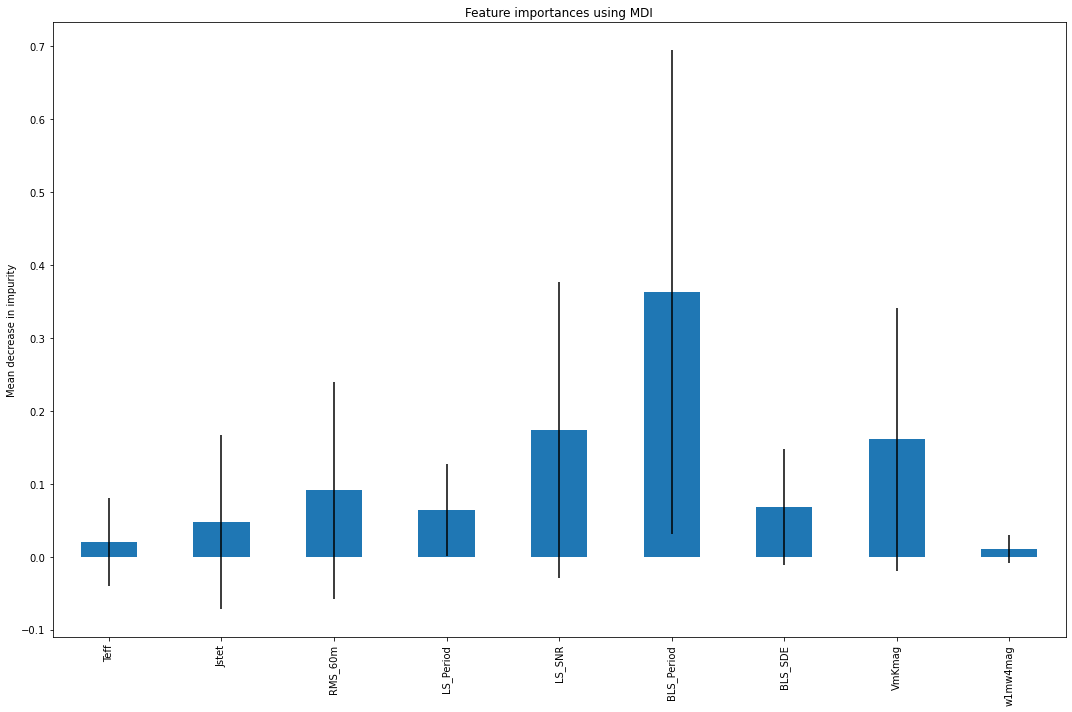

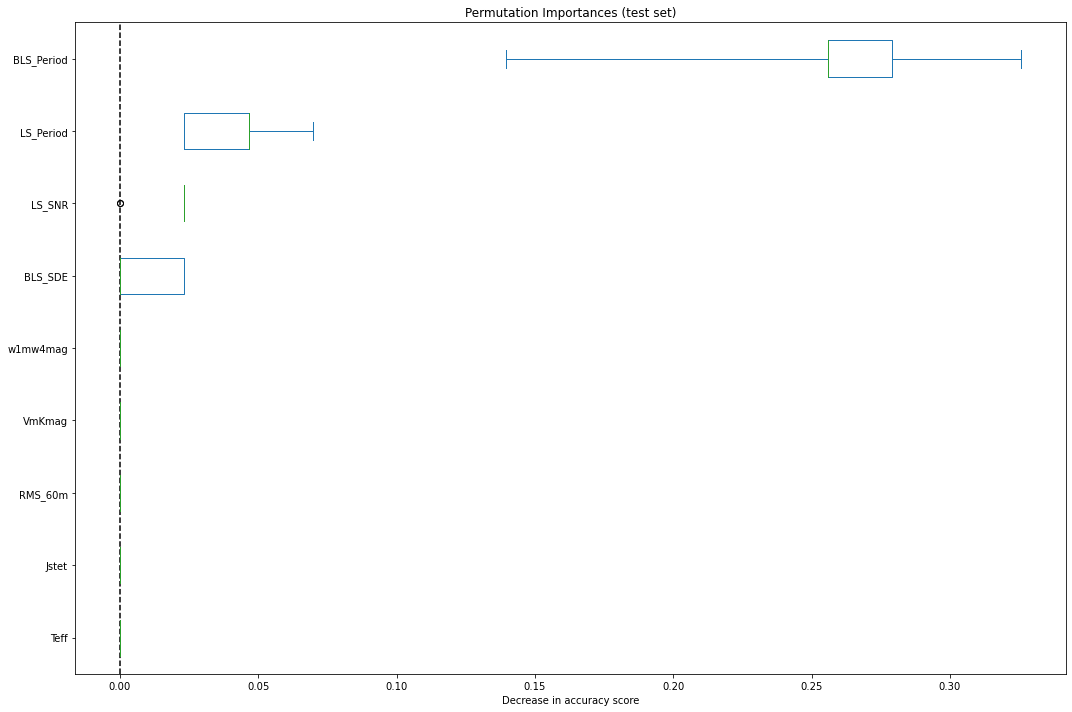

In [110]:
importance(test,0.25,0.75)

In [31]:
test2 = pd.concat([GDOR_clean,DCEP_clean,DSCT_clean,ED_clean,RR_clean,EC_clean,MISC_clean,CST_clean])
test2 = test2.drop(columns = [0])
test2


,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,GDOR,7359.0,6.0574,0.00837,0.61577449,1699.20403,0.61468223,6.23017,0.754000,0.092
1,GDOR,5686.0,6.27668,0.00894,0.61577449,727.25843,0.61468223,6.11416,1.672000,3.026
2,GDOR,4765.0,5.78344,0.00851,0.61577449,846.25653,1.723477,6.62088,2.374000,4.869
3,GDOR,7447.0,43.87504,0.03108,0.8864015,2123.30339,0.88616383,7.56841,0.620000,-0.054
4,GDOR,6983.0,3.1612,0.00535,1.06232855,978.00326,3.16383782,7.5368,1.470000,0.061
...,...,...,...,...,...,...,...,...,...,...
4,CST,5186.0,1.24233,0.01675,14.62736421,78.18818,13.895996,10.10106,1.950001,5.682
5,CST,3287.0,-0.20252,0.00341,16.37271647,99.86534,13.916809,10.09492,5.398000,1.102
6,CST,3759.0,0.00766,0.01313,9.27787267,37.28302,0.10409947,7.74119,3.888000,2.709
7,CST,5887.0,-0.29841,0.00057,11.133252,39.38907,13.916565,10.34018,1.596001,1.092


In [32]:
bestcols(test2,cols,RandomForestClassifier(random_state=50,n_estimators=10),4,False)

0.889763779527559 ['BLS_Period', 'LS_Period']
0.9271653543307087 ['BLS_Period', 'LS_Period', 'LS_SNR']
0.968503937007874 ['BLS_Period', 'LS_Period', 'BLS_SDE', 'LS_SNR']
0.9389763779527559 All columns
Duration: 0:01:10.670868


In [51]:
bestcols(test2,cols,KNeighborsClassifier(n_neighbors=10),4,False)

0.83003300330033 ['BLS_Period', 'RMS_60m']
0.8597359735973598 ['LS_Period', 'BLS_SDE', 'BLS_Period']
0.8696369636963697 ['BLS_Period', 'LS_Period', 'RMS_60m', 'BLS_SDE']
0.7029702970297029 All columns
Duration: 0:00:38.937777


In [52]:
bestcols(test2,cols,MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(15,), max_iter=10,random_state=1),4,False)

0.7442244224422442 ['BLS_Period', 'VmKmag']
0.7491749174917491 ['Teff', 'Jstet', 'BLS_Period']
0.7722772277227723 ['VmKmag', 'BLS_SDE', 'BLS_Period', 'Jstet']
0.5627062706270627 All columns
Duration: 0:01:59.653557


In [53]:
bestcols(test2,cols,KMeans(n_clusters = 7, random_state = 0, n_init=10),4,True)

0.7581470973969502 ['LS_SNR', 'VmKmag']
0.7658318077096758 ['BLS_SDE', 'RMS_60m', 'LS_SNR']
0.7997752227443233 ['LS_SNR', 'VmKmag', 'BLS_Period', 'RMS_60m']
0.0 All columns
Duration: 0:04:48.163063


In [34]:
X = pd.concat([test2['BLS_SDE'],test2['LS_Period'],test2['BLS_Period'],test2['LS_SNR'],test2['Jstet']], axis=1)
X = X.apply(pd.to_numeric)
Y = test2['Type']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, train_size=0.7)

forest = RandomForestClassifier(random_state=50,n_estimators=10)
forest.fit(X_train, y_train)

ypredfor = forest.predict(X_test)

metrics.accuracy_score(y_test, ypredfor)

0.9459016393442623

In [35]:
metrics.confusion_matrix(y_test, ypredfor)

array([[  0,   0,   0,   0,   0,   0,   2,   0],
       [  0,  77,   0,   0,   1,   0,   1,   0],
       [  0,   0,  46,   2,   0,   0,   0,   1],
       [  0,   0,   6,  79,   2,   0,   0,   0],
       [  0,   1,   0,   2,  80,   0,   0,   2],
       [  0,   0,   0,   0,   2,   0,   0,   1],
       [  0,   0,   2,   0,   1,   0, 245,   0],
       [  0,   0,   0,   2,   5,   0,   0,  50]])

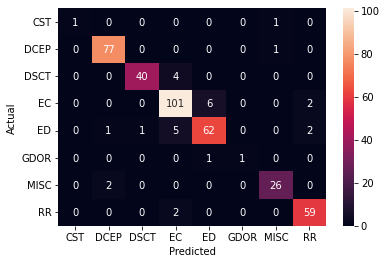

In [47]:
#From chatgpt
# Find unique labels and sort them
unique_labels = sorted(set(y_test).union(set(ypredfor)))

# Compute the confusion matrix with sorted labels
cm = metrics.confusion_matrix(y_test, ypredfor, labels=unique_labels)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Text(0.5, 0, 'BLS_Period')

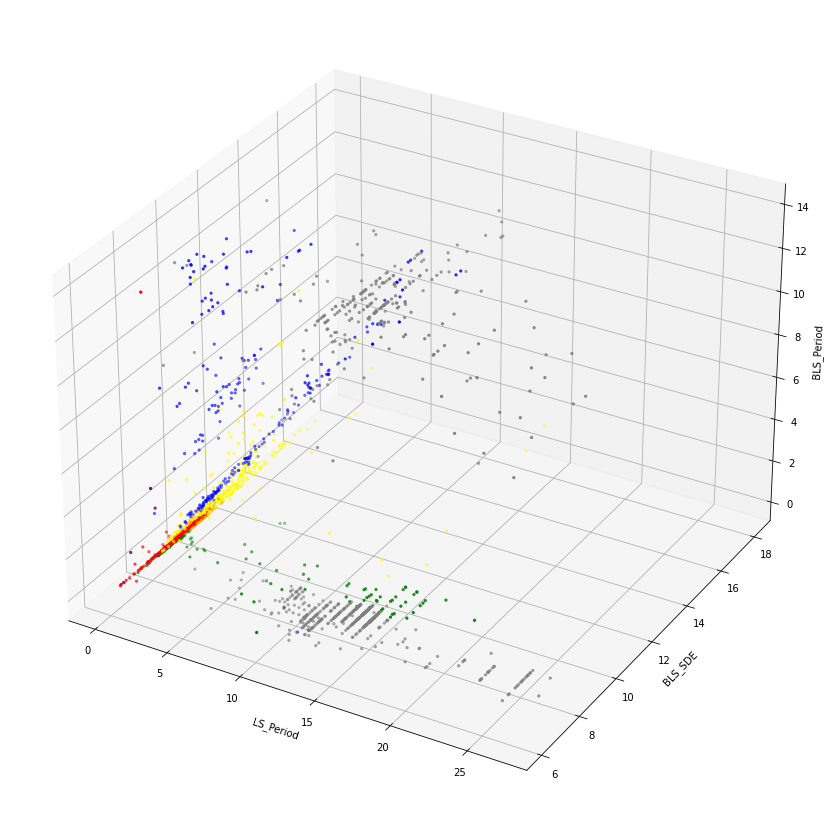

In [37]:
test2 = pd.concat([GDOR_clean,DCEP_clean,DSCT_clean,ED_clean,RR_clean,EC_clean,MISC_clean])
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(pd.to_numeric(RR_clean['LS_Period']), pd.to_numeric(RR_clean['BLS_SDE']), pd.to_numeric(RR_clean['BLS_Period']), marker = '.', color = 'red')
ax.scatter(pd.to_numeric(EC_clean['LS_Period']), pd.to_numeric(EC_clean['BLS_SDE']), pd.to_numeric(EC_clean['BLS_Period']), marker = '.', color = 'orange')
ax.scatter(pd.to_numeric(ED_clean['LS_Period']), pd.to_numeric(ED_clean['BLS_SDE']), pd.to_numeric(ED_clean['BLS_Period']), marker = '.', color = 'yellow')
ax.scatter(pd.to_numeric(DSCT_clean['LS_Period']), pd.to_numeric(DSCT_clean['BLS_SDE']), pd.to_numeric(DSCT_clean['BLS_Period']), marker = '.', color = 'green')
ax.scatter(pd.to_numeric(DCEP_clean['LS_Period']), pd.to_numeric(DCEP_clean['BLS_SDE']), pd.to_numeric(DCEP_clean['BLS_Period']), marker = '.', color = 'blue')
ax.scatter(pd.to_numeric(GDOR_clean['LS_Period']), pd.to_numeric(GDOR_clean['BLS_SDE']), pd.to_numeric(GDOR_clean['BLS_Period']), marker = '.', color = 'purple')
ax.scatter(pd.to_numeric(MISC_clean['LS_Period']), pd.to_numeric(MISC_clean['BLS_SDE']), pd.to_numeric(MISC_clean['BLS_Period']), marker = '.', color = 'gray')

ax.set_xlabel('LS_Period')
ax.set_ylabel('BLS_SDE')
ax.set_zlabel('BLS_Period')

In [199]:
import plotly.express as px

test2new = test2[['LS_Period','BLS_Period','BLS_SDE']].apply(pd.to_numeric)

test = pd.concat([test2new,test2['Type']], axis=1)

fig = px.scatter_3d(test, x='LS_Period', y='BLS_Period', z='BLS_SDE', color='Type')

fig.update_traces(marker_size = 2)

fig.show()

In [200]:
test2new = test2[['LS_Period','LS_SNR','BLS_SDE']].apply(pd.to_numeric)

test = pd.concat([test2new,test2['Type']], axis=1)

fig = px.scatter_3d(test, x='LS_Period', y='LS_SNR', z='BLS_SDE', color='Type')

fig.update_traces(marker_size = 2)

fig.show()

In [201]:
test2new = test2[['LS_Period','Jstet','BLS_SDE']].apply(pd.to_numeric)

test = pd.concat([test2new,test2['Type']], axis=1)

fig = px.scatter_3d(test, x='LS_Period', y='Jstet', z='BLS_SDE', color='Type')

fig.update_traces(marker_size = 2)

fig.show()

In [202]:
trees = forest.estimators_

for i, tree in enumerate(trees):
    print(f"Tree {i}:")
    print("Number of nodes:", tree.tree_.node_count)
    print("Tree depth:", tree.tree_.max_depth)
    #print("Left children nodes:", tree.tree_.children_left)
    #print("Right children nodes:", tree.tree_.children_right)
    #print("Node values (counts):", tree.tree_.value)
    #print("Impurity at nodes:", tree.tree_.impurity)



Tree 0:
Number of nodes: 93
Tree depth: 9
Tree 1:
Number of nodes: 81
Tree depth: 11
Tree 2:
Number of nodes: 93
Tree depth: 10
Tree 3:
Number of nodes: 75
Tree depth: 9
Tree 4:
Number of nodes: 89
Tree depth: 10
Tree 5:
Number of nodes: 87
Tree depth: 10
Tree 6:
Number of nodes: 105
Tree depth: 9
Tree 7:
Number of nodes: 95
Tree depth: 10
Tree 8:
Number of nodes: 95
Tree depth: 10
Tree 9:
Number of nodes: 99
Tree depth: 13


In [203]:
tree_list = []
for i,tree in enumerate(trees):
    tree_list.append(tree)


In [204]:
print("Number of nodes:", tree_list[2].tree_.node_count)

Number of nodes: 93


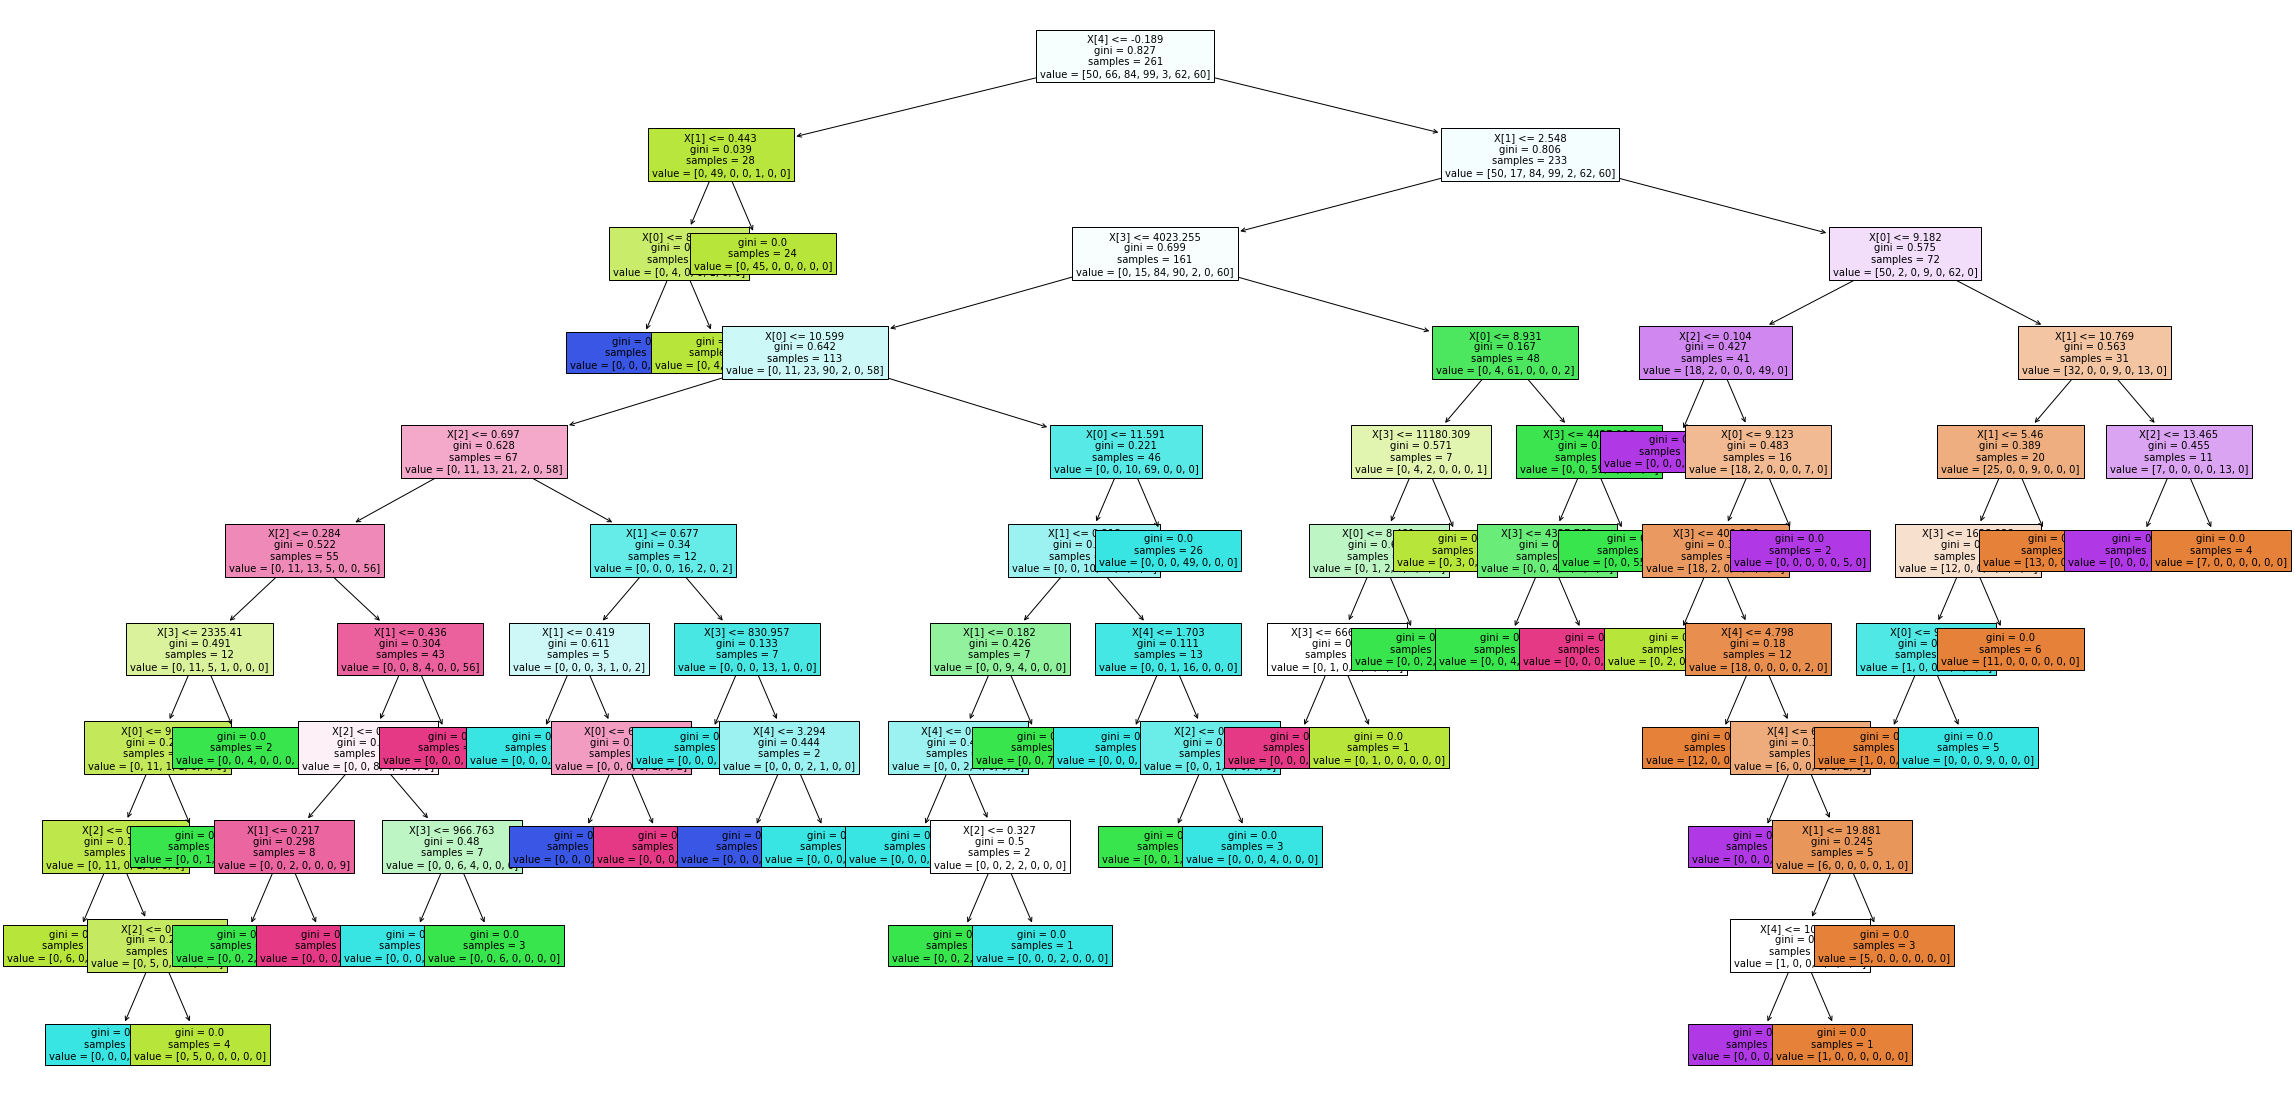

In [219]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20))
plot_tree(tree_list[7],filled = True,fontsize = 10)
plt.show()

In [24]:
MISC3 = MISC.head(1000)
MISC3 = MISC3.reset_index()
MISC3 = MISC3.drop('index',axis = 1)

testing = pd.read_csv('MISCto999.csv', sep=',',header = None)
ff = pd.concat([testing, MISC3], axis=1)
z = []
for i in range(len(ff[0])):
    if ff[0][i] == 'yes':
        z.append(i)
        
fe = ff.drop(z)
fe = fe.reset_index()
MISC_nos = fe.drop('index',axis = 1)
MISC_nos

,0,_1,Type,TIC_ID,Sector,Camera,CCD,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,no,317.56316 -38.864979,MISC,115243543,sector01,1,1,317.56316,-38.864979,12.4209995269775,9.89200019836426,9.83600044250488,8.55300045013428,4995.64990234375,-0.26827,0.00087,14.64895158,110.69681,13.916504,11.27113
1,no,324.029588 -37.31874,MISC,382298838,sector01,1,1,324.029588,-37.31874,12.3269996643066,10.298999786377,10.2449998855591,8.4350004196167,5102.0,4.5393,0.01451,13.916504,735.34418,0.10409945,8.33016
2,no,318.312027 -44.566841,MISC,382317996,sector01,1,1,318.312027,-44.566841,11.8760004043579,10.8640003204346,10.8030004501343,8.78499984741211,6530.0,-0.17415,0.00139,23.19417333,478.97381,0.10426174,7.36557
3,no,321.190646 -35.003829,MISC,211382584,sector01,1,1,321.190646,-35.003829,12.8430004119873,9.84700012207031,9.75899982452393,8.85700035095215,4215.0,1.89756,0.01124,12.10130783,1902.70054,11.51953657,11.05938
4,no,325.324269 -36.086403,MISC,321010992,sector01,1,1,325.324269,-36.086403,13.0150003433228,11.2449998855591,11.2360000610352,8.99899959564209,5393.0,4.41241,0.02874,0.17138552,10444.52099,0.34273501,9.52029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,no,83.882333 -79.497359,MISC,261136296,sector01,4,2,83.882333,-79.497359,13.5860004425049,11.5979995727539,11.4890003204346,9.48900032043457,5481.0,3.2713,0.02512,0.20257009,6112.2722,0.40499799,10.86148
197,no,83.719665 -79.510536,MISC,261107694,sector01,4,2,83.719665,-79.510536,13.7729997634888,11.2200002670288,11.1590003967285,9.74100017547607,4543.0,0.01479,0.00257,14.64901579,241.90757,0.10409946,8.46632
198,no,99.657869 -73.208061,MISC,142144287,sector01,4,2,99.657869,-73.208061,13.7799997329712,11.9130001068115,11.8769998550415,9.41899967193604,5685.0,-0.10664,0.00297,12.10136087,228.10408,11.51957837,8.10707
199,no,71.598903 -78.20961,MISC,319259066,sector01,4,2,71.598903,-78.20961,13.8199996948242,12.2130002975464,12.1630001068115,9.47799968719482,5964.0,-0.27513,0.00192,1.00119173,28.21543,10.89411175,6.21804


In [76]:
%%capture
clean(MISC_nos,'const_new','new_CST_images',100,0.001)

In [50]:
h = []
for i in range(len(ml['Type'])):
    if 'MISC' not in ml['Type'][i]:
        h.append(i)
MISC4 = ml.drop(h)

for val in MISC4.Type.unique():
    MISC4.replace(to_replace=val, value='CST', inplace=True)

MISC4 = MISC4.head(1000)
MISC4 = MISC4.reset_index()
MISC4 = MISC4.drop('index',axis = 1)

testing = pd.read_csv('MISCto999.csv', sep=',',header = None)
ff = pd.concat([testing, MISC4], axis=1)
z = []
for i in range(len(ff[0])):
    if ff[0][i] == 'yes':
        z.append(i)
        
fe = ff.drop(z)
fe = fe.reset_index()
MISC_clean3 = fe.drop('index',axis = 1)
MISC_clean3 = MISC_clean3.drop(0,axis = 1)

testing2 = pd.read_csv('const_new.csv', sep=',',header = None)
ff = pd.concat([testing2, MISC_clean3], axis=1)
z = []
for i in range(len(ff[0])):
    if ff[0][i] == 'no':
        z.append(i)
        
fe = ff.drop(z)
fe = fe.reset_index()
const2_clean = fe.drop('index',axis = 1)

const2_clean


,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,CST,4995.64990234375,-0.26827,0.00087,14.64895158,110.69681,13.916504,11.27113,2.528999,1.283000
1,yes,CST,5068.0,-0.17981,0.01082,14.60507053,16.7334,13.874817,8.75977,2.061001,5.599000
2,yes,CST,5021.0,-0.12486,0.00123,14.56157474,252.03923,12.94125137,10.04936,2.166000,1.342000
3,yes,CST,5550.0,-0.00684,0.00842,14.63828632,207.01731,13.906372,9.14985,1.771000,4.139999
4,yes,CST,4438.0,-0.25405,0.00072,14.64927263,75.37167,0.10415351,8.65289,2.773000,4.766999
5,yes,CST,4617.0,0.64612,0.00979,13.8959965,319.81315,0.1040983,8.51396,2.546000,3.408000
6,yes,CST,4371.0,2.07796,0.04152,9.58344586,445.5607,0.1040983,8.51871,2.863000,4.172999
7,yes,CST,5241.0,0.49865,0.00684,14.63828684,1048.10064,0.10415292,8.6693,1.901000,4.842999
8,yes,CST,5740.0,0.62466,0.00921,16.32331353,583.49712,9.34921607,8.35612,1.641000,2.771000
9,yes,CST,4899.0,-0.22907,0.00411,14.60507,20.94544,13.8748165,7.12134,2.171000,3.635000


In [51]:
CONST_clean = pd.concat([CST_clean, const2_clean])
CONST_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,CST,6039.0,-0.31105,0.00038,3.91720197,49.06805,11.51238434,9.12735,1.352000,1.102000
1,yes,CST,3682.0,2.30495,0.00271,14.64895158,1010.70715,0.10420759,8.61805,4.034999,4.991000
2,yes,CST,6130.0,-0.13778,0.00031,14.59414789,149.49302,13.8644405,13.39624,1.297000,0.025000
3,yes,CST,4366.0,5.10758,0.0073,9.59775724,178.1375,13.916748,9.19268,2.779000,2.232000
4,yes,CST,5186.0,1.24233,0.01675,14.62736421,78.18818,13.895996,10.10106,1.950001,5.682000
5,yes,CST,3287.0,-0.20252,0.00341,16.37271647,99.86534,13.916809,10.09492,5.398000,1.102000
6,yes,CST,3759.0,0.00766,0.01313,9.27787267,37.28302,0.10409947,7.74119,3.888000,2.709000
7,yes,CST,5887.0,-0.29841,0.00057,11.133252,39.38907,13.916565,10.34018,1.596001,1.092000
8,yes,CST,5380.0,0.37508,0.0062,14.64901579,758.58715,13.916565,9.56175,2.037000,1.473000
0,yes,CST,4995.64990234375,-0.26827,0.00087,14.64895158,110.69681,13.916504,11.27113,2.528999,1.283000


In [52]:
CONST_clean = CONST_clean.reset_index()
CONST_clean = CONST_clean.drop('index',axis = 1)
CONST_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,CST,6039.0,-0.31105,0.00038,3.91720197,49.06805,11.51238434,9.12735,1.352000,1.102000
1,yes,CST,3682.0,2.30495,0.00271,14.64895158,1010.70715,0.10420759,8.61805,4.034999,4.991000
2,yes,CST,6130.0,-0.13778,0.00031,14.59414789,149.49302,13.8644405,13.39624,1.297000,0.025000
3,yes,CST,4366.0,5.10758,0.0073,9.59775724,178.1375,13.916748,9.19268,2.779000,2.232000
4,yes,CST,5186.0,1.24233,0.01675,14.62736421,78.18818,13.895996,10.10106,1.950001,5.682000
5,yes,CST,3287.0,-0.20252,0.00341,16.37271647,99.86534,13.916809,10.09492,5.398000,1.102000
6,yes,CST,3759.0,0.00766,0.01313,9.27787267,37.28302,0.10409947,7.74119,3.888000,2.709000
7,yes,CST,5887.0,-0.29841,0.00057,11.133252,39.38907,13.916565,10.34018,1.596001,1.092000
8,yes,CST,5380.0,0.37508,0.0062,14.64901579,758.58715,13.916565,9.56175,2.037000,1.473000
9,yes,CST,4995.64990234375,-0.26827,0.00087,14.64895158,110.69681,13.916504,11.27113,2.528999,1.283000


In [136]:
%%capture
clean(MISC_nos,'GDOR_new','new_GDOR_images',100,0.001)

In [34]:
h = []
for i in range(len(ml['Type'])):
    if 'MISC' not in ml['Type'][i]:
        h.append(i)
MISC5 = ml.drop(h)

for val in MISC5.Type.unique():
    MISC5.replace(to_replace=val, value='GDOR', inplace=True)

MISC5 = MISC5.head(1000)
MISC5 = MISC5.reset_index()
MISC5 = MISC5.drop('index',axis = 1)

testing = pd.read_csv('MISCto999.csv', sep=',',header = None)
ff = pd.concat([testing, MISC5], axis=1)
z = []
for i in range(len(ff[0])):
    if ff[0][i] == 'yes':
        z.append(i)
        
fe = ff.drop(z)
fe = fe.reset_index()
MISC_clean2 = fe.drop('index',axis = 1)
MISC_clean2 = MISC_clean2.drop(0,axis = 1)

testing2 = pd.read_csv('GDOR_new.csv', sep=',',header = None)
ff = pd.concat([testing2, MISC_clean2], axis=1)
z = []
for i in range(len(ff[0])):
    if ff[0][i] == 'no':
        z.append(i)
        
fe = ff.drop(z)
fe = fe.reset_index()
GDOR2_clean = fe.drop('index',axis = 1)

GDOR2_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,GDOR,6854.0,2.6006,0.01319,1.01210938,1471.06387,1.01121616,8.18687,0.919999,1.465
1,yes,GDOR,6820.85009765625,1.62282,0.01058,1.22077272,553.10238,1.2129511,6.97952,0.679999,1.062


In [32]:
newGDOR_clean = pd.concat([GDOR_clean, GDOR2_clean])
newGDOR_clean = newGDOR_clean.reset_index()
newGDOR_clean = newGDOR_clean.drop('index',axis = 1)
newGDOR_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,GDOR,7359.0,6.0574,0.00837,0.61577449,1699.20403,0.61468223,6.23017,0.754000,0.092
1,yes,GDOR,5686.0,6.27668,0.00894,0.61577449,727.25843,0.61468223,6.11416,1.672000,3.026
2,yes,GDOR,4765.0,5.78344,0.00851,0.61577449,846.25653,1.723477,6.62088,2.374000,4.869
3,yes,GDOR,7447.0,43.87504,0.03108,0.8864015,2123.30339,0.88616383,7.56841,0.620000,-0.054
4,yes,GDOR,6983.0,3.1612,0.00535,1.06232855,978.00326,3.16383782,7.5368,1.470000,0.061
5,yes,GDOR,5582.0,3.2137,0.00554,1.06232855,870.32509,4.23140269,7.35875,1.611000,2.423
6,yes,GDOR,7016.0,0.9563,0.00322,1.00119173,674.86712,1.00112539,7.93444,1.066000,-0.017
7,yes,GDOR,6854.0,2.6006,0.01319,1.01210938,1471.06387,1.01121616,8.18687,0.919999,1.465
8,yes,GDOR,6820.85009765625,1.62282,0.01058,1.22077272,553.10238,1.2129511,6.97952,0.679999,1.062


In [37]:
MISC_clean

,0,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,MISC,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144,6.307000,0.706000
1,yes,MISC,3070.0,30.66852,0.0231,11.59708667,2427.2134,0.10409945,7.5651,5.871000,0.306000
2,yes,MISC,3339.0,19.08789,0.01615,11.1332032,854.18351,13.01386874,9.1758,5.076000,0.179000
3,yes,MISC,3268.0,12.60208,0.01249,11.59708667,1868.85119,13.01386874,11.52001,5.491000,0.384000
4,yes,MISC,3827.0,10.08912,0.01071,11.0832032,1736.24946,0.10425821,7.60141,3.695000,0.220000
...,...,...,...,...,...,...,...,...,...,...,...
794,yes,MISC,5464.0,1.74878,0.01504,13.25387143,906.38177,0.10409946,7.62881,2.058001,2.219000
795,yes,MISC,4517.0,9.03528,0.06465,14.64901579,2658.61422,0.10409946,8.27005,2.585000,1.839001
796,yes,MISC,4031.0,0.43193,0.0058,11.133252,368.51143,0.10426174,7.86778,3.384000,1.913000
797,yes,MISC,6110.0,-0.1833,0.00431,18.55542,128.9556,12.22123974,8.00872,1.502000,2.202000


In [119]:
cols = ['Teff','Jstet','RMS_60m','LS_Period','LS_SNR','BLS_Period','BLS_SDE','VmKmag','w1mw4mag']

testing = pd.concat([newGDOR_clean,DCEP_clean,DSCT_clean,ED_clean,RR_clean,EC_clean,MISC_clean,CONST_clean])
testing = testing.drop(columns = [0])
testing

,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,GDOR,7359.0,6.0574,0.00837,0.61577449,1699.20403,0.61468223,6.23017,0.754000,0.092000
1,GDOR,5686.0,6.27668,0.00894,0.61577449,727.25843,0.61468223,6.11416,1.672000,3.026000
2,GDOR,4765.0,5.78344,0.00851,0.61577449,846.25653,1.723477,6.62088,2.374000,4.869000
3,GDOR,7447.0,43.87504,0.03108,0.8864015,2123.30339,0.88616383,7.56841,0.620000,-0.054000
4,GDOR,6983.0,3.1612,0.00535,1.06232855,978.00326,3.16383782,7.5368,1.470000,0.061000
...,...,...,...,...,...,...,...,...,...,...
21,CST,5693.0,0.06214,0.01105,14.64895105,179.59417,0.10409945,8.9271,1.642000,4.776000
22,CST,4684.0,-0.31262,0.01159,13.916504,10.78369,0.10409945,4.8842,2.467000,4.979000
23,CST,5262.0,-0.30309,0.00538,12.10130783,12.56234,13.01386874,5.16536,1.882000,4.328000
24,CST,6357.0,0.53507,0.00643,9.59763103,375.5366,0.10420759,8.34326,1.374001,2.169001


In [122]:
bestcols(testing,cols,RandomForestClassifier(random_state=20,n_estimators=25),1,False)

0.949317738791423 All columns
Duration: 0:00:00.084045


In [139]:
score = 0
while score < 0.95:
    X = testing.drop('Type',axis = 1)
    X = X.apply(pd.to_numeric)
    Y = testing['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, train_size=0.7)

    forest = RandomForestClassifier(n_estimators=30)
    forest.fit(X_train, y_train)

    ypredfor = forest.predict(X_test)

    score = metrics.accuracy_score(y_test, ypredfor)

score

0.9512987012987013

In [140]:
metrics.confusion_matrix(y_test, ypredfor)

array([[  1,   0,   0,   0,   0,   0,   8,   0],
       [  0,  58,   0,   0,   0,   0,   2,   0],
       [  0,   0,  47,   3,   0,   0,   0,   0],
       [  0,   0,   0,  85,   0,   0,   0,   0],
       [  0,   2,   0,   1,  81,   0,   1,   5],
       [  0,   0,   0,   0,   0,   2,   0,   1],
       [  0,   1,   0,   0,   1,   0, 259,   1],
       [  0,   0,   0,   3,   1,   0,   0,  53]])

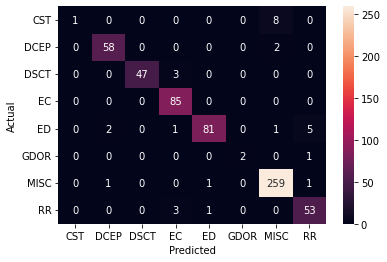

In [141]:
#From chatgpt
# Find unique labels and sort them
unique_labels = sorted(set(ypredfor).union(set(y_test)))

# Compute the confusion matrix with sorted labels
cm = metrics.confusion_matrix(y_test, ypredfor, labels=unique_labels)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [142]:
sec2cam2 = pd.read_csv('Sector2_camera2_07-15-24.csv', sep=',', comment='#', dtype = str)

VmKmag = []
for i in range(len(sec2cam2['Kmag'])):
    VmKmag.append(float(sec2cam2['Vmag'][i]) - float(sec2cam2['Kmag'][i]))
    
w1mw4mag = []
for i in range(len(sec2cam2['w1mag'])):
    w1mw4mag.append(float(sec2cam2['w1mag'][i]) - float(sec2cam2['w4mag'][i]))

dict = {'VmKmag': VmKmag, 'w1mw4mag': w1mw4mag} 
   
calcs = pd.DataFrame(dict)
   
sec2cam2ml = pd.concat([sec2cam2, calcs], axis=1)
sec2cam2wTIC = sec2cam2ml.drop(['w1mag','w4mag','Vmag','Kmag','Unnamed: 15'], axis=1)
sec2cam2wTIC = sec2cam2wTIC.dropna(axis=0)
sec2cam2wTIC = sec2cam2wTIC.reset_index()
sec2cam2wTIC = sec2cam2wTIC.drop('index',axis = 1)
sec2cam2ml = sec2cam2wTIC.drop(['TIC_ID','Sector','Camera','CCD'], axis=1)
sec2cam2ml

,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,3105.0,13.39348,0.01189,21.05750385,19728.93674,0.10408642,7.88076,5.185000,0.191
1,6311.52978515625,0.0105,0.00034,9.12491833,81.26789,13.6873775,9.21473,1.232000,0.039
2,3214.0,23.16118,0.017,22.81229583,22065.4774,0.10424866,7.90014,5.312000,0.182
3,3165.0,22.77208,0.01763,12.44307045,3161.63286,0.10408642,8.31925,5.489000,0.283
4,4779.39990234375,0.11346,0.00046,7.39858243,54.3761,13.6873775,12.30676,2.447000,0.005
...,...,...,...,...,...,...,...,...,...
197152,5587.0,-0.29594,0.00428,3.55514727,7.42706,7.25415702,5.20937,1.614999,6.874
197153,5704.0,-0.2708,0.00976,14.40770211,82.5043,13.687317,12.5061,1.527999,6.772
197154,4766.0,-0.33684,0.00369,3.60192553,10.8879,0.14500908,4.88926,2.304000,6.573
197155,5198.0,-0.26779,0.01191,14.40770211,18.42403,3.47981987,4.87843,1.938999,6.483


In [143]:
sec2cam2predfor = forest.predict(sec2cam2ml)
sec2cam2predfor = pd.DataFrame({'PredType': sec2cam2predfor})
sec2cam2predfor

,PredType
0,MISC
1,MISC
2,MISC
3,MISC
4,MISC
...,...
197152,CST
197153,MISC
197154,DSCT
197155,CST


In [145]:
sec2cam2testingallcols = pd.concat([sec2cam2predfor,sec2cam2wTIC], axis=1)
sec2cam2testingallcols

,PredType,TIC_ID,Sector,Camera,CCD,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,MISC,201290065,sector02,2,1,3105.0,13.39348,0.01189,21.05750385,19728.93674,0.10408642,7.88076,5.185000,0.191
1,MISC,201295243,sector02,2,1,6311.52978515625,0.0105,0.00034,9.12491833,81.26789,13.6873775,9.21473,1.232000,0.039
2,MISC,425882147,sector02,2,1,3214.0,23.16118,0.017,22.81229583,22065.4774,0.10424866,7.90014,5.312000,0.182
3,MISC,281764024,sector02,2,1,3165.0,22.77208,0.01763,12.44307045,3161.63286,0.10408642,8.31925,5.489000,0.283
4,MISC,281563067,sector02,2,1,4779.39990234375,0.11346,0.00046,7.39858243,54.3761,13.6873775,12.30676,2.447000,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197152,CST,389627629,sector02,2,4,5587.0,-0.29594,0.00428,3.55514727,7.42706,7.25415702,5.20937,1.614999,6.874
197153,MISC,224265294,sector02,2,4,5704.0,-0.2708,0.00976,14.40770211,82.5043,13.687317,12.5061,1.527999,6.772
197154,DSCT,120427983,sector02,2,4,4766.0,-0.33684,0.00369,3.60192553,10.8879,0.14500908,4.88926,2.304000,6.573
197155,CST,382461683,sector02,2,4,5198.0,-0.26779,0.01191,14.40770211,18.42403,3.47981987,4.87843,1.938999,6.483


In [148]:
def resulttest(dataset,seccam,foldername):

    for i in range(len(dataset['TIC_ID'])):
    
        TICID = dataset['TIC_ID'][i]
        SECTOR = dataset['Sector'][i]
        CAMERA = dataset['Camera'][i]
        CCD = dataset['CCD'][i]
        url = f"http://astro.phy.vanderbilt.edu/~oelkerrj/tess_ffi/{SECTOR}/clean/{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc"
        os.system(f"wget {url} -O {TICID}_{SECTOR}_{CAMERA}_{CCD}.lc > /dev/null 2>&1")
    
        try:
            data = pd.read_csv(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc", delimiter=' ', header=None, names=['time', 'magnitude', 'error'])
        except pd.errors.ParserError:
            os.remove(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc")
            continue
        data = data.to_numpy(dtype=float)
    
        if np.any(np.isnan(data)) or np.any(np.isinf(data)):
            os.remove(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc")
            continue
    
        lc = lk.LightCurve(time = data[:,0],flux = data[:,1]).remove_outliers(sigma=5.0,return_mask = False)

        
        pg1 = lc.to_periodogram(oversample_factor=10)
        pg2 = lc.to_periodogram(minimum_period=0.025*u.day, maximum_period=20*u.day,oversample_factor=10)
        
        phase = ((data[:,0]-data[0,0])/pg1) - np.floor((data[:,0]-data[0,0])/pg1)

        def plots(ax1,ax2,ax3):
            lc.scatter(ax=ax1)
            pg2.plot(ax=ax2)
            lc.remove_nans().fold(period=2*pg2.period_at_max_power).scatter(ax=ax3)


        fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(18,25))

        ax2.text(0.5, 0.9, f'Without constraint {pg1.period_at_max_power}', transform=ax2.transAxes, fontsize=20)
        ax2.text(0.5, 0.8, f'With constraint {pg2.period_at_max_power}', transform=ax2.transAxes, fontsize=20)

        ax1.invert_yaxis()
        ax3.invert_yaxis()

        plots(ax1,ax2,ax3)

        plt.suptitle(f"{dataset['PredType'][i]}",fontsize = 20)
        plt.savefig(f"{foldername}/{seccam}_pred_{dataset['PredType'][i]}/{TICID}_{SECTOR}_{CAMERA}_{CCD}.jpg")
        plt.close(fig)
    
        os.remove(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc")
    ;

In [ ]:
data = pd.read_csv(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc", delimiter=' ', header=None, names=['time', 'magnitude', 'error'])

In [903]:
%%capture
resulttest(sec2cam2testing,'sec2cam2','sec2cam2_results_allcols')

In [102]:
score = 0
while score < 0.95:
    X = pd.concat([testing['BLS_SDE'],testing['LS_Period'],testing['BLS_Period'],testing['LS_SNR'],testing['Jstet']], axis=1)
    X = X.apply(pd.to_numeric)
    Y = testing['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, train_size=0.7)

    forest = RandomForestClassifier(n_estimators=30)
    forest.fit(X_train, y_train)

    ypredfor = forest.predict(X_test)

    score = metrics.accuracy_score(y_test, ypredfor)

score

0.952922077922078

In [103]:
metrics.confusion_matrix(y_test, ypredfor)

array([[  2,   0,   0,   0,   0,   0,   6,   0],
       [  0,  63,   0,   0,   1,   0,   2,   0],
       [  0,   0,  41,   2,   0,   0,   0,   0],
       [  0,   0,   0, 101,   3,   0,   0,   1],
       [  0,   0,   0,   1,  73,   0,   1,   4],
       [  0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   3,   0,   0,   0,   0, 250,   1],
       [  0,   0,   0,   2,   0,   0,   2,  56]])

In [104]:
sec2cam2predfor = forest.predict(pd.concat([sec2cam2ml['BLS_SDE'],sec2cam2ml['LS_Period'],sec2cam2ml['BLS_Period'],sec2cam2ml['LS_SNR'],sec2cam2ml['Jstet']], axis=1))
sec2cam2predfor = pd.DataFrame({'PredType': sec2cam2predfor})
sec2cam2predfor

,PredType
0,MISC
1,MISC
2,MISC
3,MISC
4,MISC
...,...
197152,ED
197153,CST
197154,DSCT
197155,MISC


In [105]:
sec2cam2predicted = pd.concat([sec2cam2predfor,sec2cam2wTIC['TIC_ID'],sec2cam2wTIC['Sector'],sec2cam2wTIC['Camera'],sec2cam2wTIC['CCD'],sec2cam2ml['BLS_SDE'],sec2cam2ml['LS_Period'],sec2cam2ml['BLS_Period'],sec2cam2ml['LS_SNR'],sec2cam2ml['Jstet']], axis=1)
sec2cam2predicted


,PredType,TIC_ID,Sector,Camera,CCD,BLS_SDE,LS_Period,BLS_Period,LS_SNR,Jstet
0,MISC,201290065,sector02,2,1,7.88076,21.05750385,0.10408642,19728.93674,13.39348
1,MISC,201295243,sector02,2,1,9.21473,9.12491833,13.6873775,81.26789,0.0105
2,MISC,425882147,sector02,2,1,7.90014,22.81229583,0.10424866,22065.4774,23.16118
3,MISC,281764024,sector02,2,1,8.31925,12.44307045,0.10408642,3161.63286,22.77208
4,MISC,281563067,sector02,2,1,12.30676,7.39858243,13.6873775,54.3761,0.11346
...,...,...,...,...,...,...,...,...,...,...
197152,ED,389627629,sector02,2,4,5.20937,3.55514727,7.25415702,7.42706,-0.29594
197153,CST,224265294,sector02,2,4,12.5061,14.40770211,13.687317,82.5043,-0.2708
197154,DSCT,120427983,sector02,2,4,4.88926,3.60192553,0.14500908,10.8879,-0.33684
197155,MISC,382461683,sector02,2,4,4.87843,14.40770211,3.47981987,18.42403,-0.26779


In [110]:
sec2cam2_predGDOR = sec2cam2predicted[sec2cam2predicted['PredType'] == 'GDOR']
sec2cam2_predGDOR = sec2cam2_predGDOR.reset_index()
sec2cam2_predGDOR = sec2cam2_predGDOR.drop('index',axis = 1)
sec2cam2_predGDOR

,PredType,TIC_ID,Sector,Camera,CCD,BLS_SDE,LS_Period,BLS_Period,LS_SNR,Jstet
0,GDOR,339577583,sector02,2,1,6.56682,1.13118822,1.13576514,377.65437,8.56979
1,GDOR,201354184,sector02,2,1,6.62395,1.40383359,1.40645271,654.26775,3.39878
2,GDOR,281573512,sector02,2,1,8.5676,1.31609399,1.31432236,1634.44489,2.38646
3,GDOR,155966613,sector02,2,1,6.56714,1.05287519,1.04144179,135.72533,0.73286
4,GDOR,339577992,sector02,2,1,6.81838,1.66919238,3.3077228,719.72148,2.10303
...,...,...,...,...,...,...,...,...,...,...
82,GDOR,144331856,sector02,2,4,7.31358,1.43322691,1.43666391,3871.60757,0.85567
83,GDOR,144440417,sector02,2,4,7.60432,1.47970995,1.47902493,925.35792,0.18544
84,GDOR,139267531,sector02,2,4,8.16513,0.97543336,0.97073201,976.09693,0.49297
85,GDOR,270672274,sector02,2,4,7.70608,1.14538218,1.14223046,2099.25482,1.40976


In [111]:
%%capture
resulttest(sec2cam2_predGDOR,'sec2cam2','sec2cam2_results_5cols')

In [941]:
sec2cam2_predRR = sec2cam2predicted[sec2cam2predicted['PredType'] == 'RR']
sec2cam2_predRR = sec2cam2_predRR.reset_index()
sec2cam2_predRR = sec2cam2_predRR.drop('index',axis = 1)

sec2cam2_predRRsam = sec2cam2_predRR.sample(n=50)
sec2cam2_predRRsam = sec2cam2_predRRsam.reset_index()
sec2cam2_predRRsam = sec2cam2_predRRsam.drop('index',axis = 1)
sec2cam2_predRRsam

,PredType,TIC_ID,Sector,Camera,CCD,BLS_SDE,LS_Period,BLS_Period,LS_SNR,Jstet
0,RR,183563446,sector02,2,3,3.53754,1.55541159,0.37317933,6.2326,-0.36616
1,RR,389729089,sector02,2,4,9.67261,0.62930193,0.62767852,2863.47907,1.19844
2,RR,120607903,sector02,2,3,8.5281,0.56560421,0.56414508,380.88503,-0.04591
3,RR,199734646,sector02,2,2,4.37176,0.32092902,0.516245,6.62974,-0.35733
4,RR,311087288,sector02,2,3,4.03937,0.35598497,0.55022164,4.57104,-0.33155
5,RR,201309720,sector02,2,1,5.99361,0.37706274,0.37317915,8.48334,-0.32559
6,RR,165878751,sector02,2,4,7.71154,0.53781206,0.53696845,1959.03933,0.20506
7,RR,80289210,sector02,2,3,9.27281,0.69657109,0.69750403,2759.90318,7.7312
8,RR,102069507,sector02,2,2,3.78706,0.44296513,0.3975818,4.70571,-0.33973
9,RR,311091232,sector02,2,3,6.15711,0.56443802,0.45740141,7.50684,-0.33415


In [942]:
%%capture
resulttest(sec2cam2_predRRsam,'sec2cam2','sec2cam2_results_5cols')

In [943]:
sec2cam2_predED = sec2cam2predicted[sec2cam2predicted['PredType'] == 'ED']
sec2cam2_predED = sec2cam2_predED.reset_index()
sec2cam2_predED = sec2cam2_predED.drop('index',axis = 1)

sec2cam2_predEDsam = sec2cam2_predED.sample(n=50)
sec2cam2_predEDsam = sec2cam2_predEDsam.reset_index()
sec2cam2_predEDsam = sec2cam2_predEDsam.drop('index',axis = 1)
sec2cam2_predEDsam

,PredType,TIC_ID,Sector,Camera,CCD,BLS_SDE,LS_Period,BLS_Period,LS_SNR,Jstet
0,ED,80419060,sector02,2,2,10.14581,1.80100296,1.79693185,579.48261,0.02688
1,ED,120414806,sector02,2,4,12.385,1.27335308,2.54861837,389.61988,6.14561
2,ED,339578940,sector02,2,1,10.02218,1.17488219,1.16884716,289.67605,-0.04517
3,ED,102029190,sector02,2,2,11.40951,8.29552879,8.13679968,20377.40747,19.11186
4,ED,281780102,sector02,2,1,10.08326,0.48279991,0.48271089,82.25158,-0.24274
5,ED,80452963,sector02,2,2,10.89,2.4442183,4.93481073,65.26151,-0.29574
6,ED,183530211,sector02,2,3,10.97061,0.54970369,1.098459,330.85083,-0.12109
7,ED,144377802,sector02,2,4,9.78801,1.49474765,3.00948845,208.52173,-0.2337
8,ED,120490616,sector02,2,3,12.74666,15.20846889,0.55325602,79.38855,-0.21716
9,ED,120428113,sector02,2,4,9.29757,0.14885608,13.687317,8.40712,-0.32633


In [944]:
%%capture
resulttest(sec2cam2_predEDsam,'sec2cam2','sec2cam2_results_5cols')

In [945]:
sec2cam2_predEC = sec2cam2predicted[sec2cam2predicted['PredType'] == 'EC']
sec2cam2_predEC = sec2cam2_predEC.reset_index()
sec2cam2_predEC = sec2cam2_predEC.drop('index',axis = 1)

sec2cam2_predECsam = sec2cam2_predEC.sample(n=50)
sec2cam2_predECsam = sec2cam2_predECsam.reset_index()
sec2cam2_predECsam = sec2cam2_predECsam.drop('index',axis = 1)
sec2cam2_predECsam

,PredType,TIC_ID,Sector,Camera,CCD,BLS_SDE,LS_Period,BLS_Period,LS_SNR,Jstet
0,EC,251822991,sector02,2,3,10.59571,0.12822128,0.12823443,1435.99948,0.07371
1,EC,224263015,sector02,2,4,9.96301,0.14332269,0.28677271,2347.59801,0.15011
2,EC,156000816,sector02,2,1,11.41797,0.23824852,0.23810714,1787.99763,0.56247
3,EC,224265252,sector02,2,4,10.37332,0.24551241,0.49097927,4289.11977,5.31706
4,EC,360148356,sector02,2,4,9.05879,0.20292538,0.40561902,6807.03243,1.96668
5,EC,340782817,sector02,2,2,10.28959,0.16008915,0.32017925,9201.57768,6.92262
6,EC,355651035,sector02,2,1,10.90108,0.2921532,0.29177707,8642.76295,30.51495
7,EC,201334375,sector02,2,1,9.68739,0.16431426,0.16437279,9871.07541,3.78704
8,EC,382422822,sector02,2,4,8.32318,0.20128407,0.40236535,3988.68772,0.56906
9,EC,201235331,sector02,2,1,9.555,0.12673498,0.2534464,177.26481,-0.17837


In [946]:
%%capture
resulttest(sec2cam2_predECsam,'sec2cam2','sec2cam2_results_5cols')

In [115]:
def samples(dataset):
    types = ['CST','DCEP','DSCT','ED','EC','RR','GDOR','MISC']
    dataframes = []
    for val in types:
        sec2cam2_predtype = sec2cam2predicted[sec2cam2predicted['PredType'] == val]
        if len(sec2cam2_predtype) >= 50:
            sec2cam2_predtypesam = sec2cam2_predtype.sample(n=50)
        else:
            sec2cam2_predtypesam = sec2cam2_predtype
        sec2cam2_predtypesam = sec2cam2_predtypesam.reset_index()
        sec2cam2_predtypesam = sec2cam2_predtypesam.drop('index',axis = 1)
        dataframes.append(sec2cam2_predtypesam)
    sec2cam2_predicts = pd.concat([dataframes[0],dataframes[1],dataframes[2],dataframes[3],dataframes[4],dataframes[5],dataframes[6],dataframes[7]], axis=0)
    sec2cam2_predicts = sec2cam2_predicts.reset_index()
    sec2cam2_predicts = sec2cam2_predicts.drop('index',axis = 1)
    return sec2cam2_predicts



In [116]:
sec2cam2predictedsam = samples(sec2cam2predicted)
sec2cam2predictedsam

,PredType,TIC_ID,Sector,Camera,CCD,BLS_SDE,LS_Period,BLS_Period,LS_SNR,Jstet
0,CST,199735325,sector02,2,2,7.0773,15.20846944,13.6876225,15.80405,-0.34827
1,CST,206347703,sector02,2,1,11.56188,14.40776579,13.6873775,30.17957,-0.3138
2,CST,80255550,sector02,2,1,5.66164,15.20819722,13.6873775,8.88035,-0.32571
3,CST,219342533,sector02,2,1,12.31242,13.6873775,13.6873775,45.50217,-0.25698
4,CST,158536395,sector02,2,2,5.75089,13.6876225,12.81350148,24.42641,-0.30891
...,...,...,...,...,...,...,...,...,...,...
395,MISC,179678519,sector02,2,3,9.06284,14.40985778,12.18150217,339.11317,-0.00072
396,MISC,160079199,sector02,2,4,8.33913,7.604065,7.25415702,63.7664,-0.2789
397,MISC,63726602,sector02,2,3,5.54179,14.64131667,0.10432631,287.06122,0.01463
398,MISC,270259549,sector02,2,4,4.14077,14.40770211,5.96104457,43.74233,-0.26516


In [117]:
%%capture
resulttest(sec2cam2predictedsam,'sec2cam2','sec2cam2_results_5cols')

In [146]:
sec2cam2samallcols = samples(sec2cam2testingallcols)
sec2cam2samallcols

,PredType,TIC_ID,Sector,Camera,CCD,BLS_SDE,LS_Period,BLS_Period,LS_SNR,Jstet
0,CST,183561916,sector02,2,3,11.30206,14.40802316,13.687622,56.96736,-0.27205
1,CST,316934807,sector02,2,1,13.41288,14.40776579,13.6873775,41.21242,-0.28644
2,CST,251822717,sector02,2,3,4.74947,13.677185,0.11148885,10.82982,-0.2687
3,CST,402047690,sector02,2,1,12.29862,14.40776579,13.6873775,63.36625,-0.21959
4,CST,144326500,sector02,2,4,4.30633,14.39678,13.676941,11.65159,-0.32589
...,...,...,...,...,...,...,...,...,...,...
395,MISC,41841492,sector02,2,2,9.79991,6.84381125,13.6876225,163.9078,-0.15427
396,MISC,120587834,sector02,2,3,7.77116,12.43380455,0.10413985,140.06675,-0.24645
397,MISC,117396682,sector02,2,3,12.07303,13.03583048,12.81350104,112.12216,-0.25081
398,MISC,281797344,sector02,2,1,16.69072,15.20819722,13.6873775,35.50091,-0.26078


In [147]:
%%capture
resulttest(sec2cam2samallcols,'sec2cam2','sec2cam2_results_allcols')


%%capture
resulttest(sec2cam2samallcols[0],'sec2cam2','sec2cam2_results_allcols')

In [150]:
%%capture
resulttest(sec2cam2samallcols[0],'sec2cam2','sec2cam2_results_allcols')

KeyError: 0

In [151]:
sec2cam2samallcols[0]

KeyError: 0

In [167]:
url = f"http://astro.phy.vanderbilt.edu/~oelkerrj/tess_ffi/sector02/clean/183561916_sector02_2_3.lc"
os.system(f"wget {url} -O 183561916_sector02_2_3.lc > /dev/null 2>&1")
data = pd.read_csv("183561916_sector02_2_3.lc", delimiter=' ', header=None, names=['time', 'magnitude', 'error'])
data

,time,magnitude,error
0,1354.119629,16.776051,0.024604
1,1354.140503,16.779020,0.024696
2,1354.161255,16.776249,0.024723
3,1354.182129,16.772671,0.024632
4,1354.203003,16.775356,0.024698
...,...,...,...
1240,1381.411499,16.778696,0.024824
1241,1381.432373,16.780157,0.024867
1242,1381.453247,16.779961,0.024797
1243,1381.473999,16.777390,0.024810


In [178]:
phase = ((data['time']-data['time'][0])/1.2) - np.floor((data['time']-data['time'][0])/1.2)
phase

0       0.000000
1       0.017395
2       0.034688
3       0.052083
4       0.069478
          ...   
1240    0.743225
1241    0.760620
1242    0.778015
1243    0.795308
1244    0.812703
Name: time, Length: 1245, dtype: float64

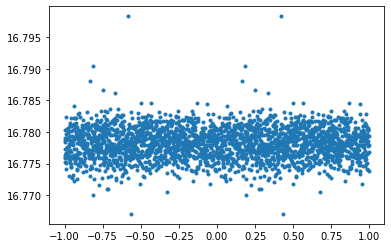

In [175]:
phase2 = [phase-1.0,phase]
mag = [data['magnitude'],data['magnitude']]
plt.scatter(phase2,mag,marker = ".")